In [1]:
import numpy as np
import pandas as pd

In [2]:
top_players = pd.read_csv("../data/top5-players.csv")

### Lectura de los datos e info general del dataframe

Se comprueba como existe una columna denominada RK que es el orden de los jugadores, por lo que estaríamos duplicando el índice. Se procede a eliminar la columna Rk 

In [5]:
top_players.drop("Rk", axis=1, inplace=True)

Se extraen los principales estadísticos de las variables númericas para una primera exploración

In [7]:
top_players.describe()

,Age,Born,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,...,Gls_90,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90
count,2848.000000,2848.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,...,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000
mean,25.060744,1997.600070,18.969846,13.514727,1213.301543,13.482328,1.720196,1.221950,2.942146,1.565568,...,0.121778,0.093296,0.214916,0.114141,0.207293,0.132333,0.099007,0.231438,0.124167,0.223332
std,4.590521,4.596294,11.517930,11.251227,961.584066,10.685045,3.203532,1.965371,4.615768,2.840353,...,0.284138,0.366238,0.472989,0.277802,0.467984,0.207826,0.236825,0.334707,0.198482,0.327711
min,15.000000,1982.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,1994.000000,8.000000,2.000000,296.750000,3.300000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.010000,0.050000,0.020000,0.050000
50%,25.000000,1998.000000,20.000000,12.000000,1113.000000,12.400000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.090000,0.000000,0.090000,0.060000,0.060000,0.140000,0.060000,0.140000
75%,28.000000,2001.000000,29.000000,23.000000,1987.000000,22.100000,2.000000,2.000000,4.000000,2.000000,...,0.150000,0.120000,0.290000,0.140000,0.280000,0.180000,0.130000,0.330000,0.170000,0.310000
max,40.000000,2008.000000,38.000000,38.000000,3420.000000,38.000000,36.000000,14.000000,44.000000,31.000000,...,6.000000,11.250000,11.250000,6.000000,11.250000,4.550000,6.850000,6.850000,4.550000,6.850000


In [ ]:
top_players.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2852 entries, 0 to 2851
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player       2852 non-null   object 
 1   Nation       2849 non-null   object 
 2   Pos          2852 non-null   object 
 3   Squad        2852 non-null   object 
 4   Comp         2852 non-null   object 
 5   Age          2848 non-null   float64
 6   Born         2848 non-null   float64
 7   MP           2852 non-null   int64  
 8   Starts       2852 non-null   int64  
 9   Min          2852 non-null   int64  
 10  90s          2852 non-null   float64
 11  Gls          2852 non-null   int64  
 12  Ast          2852 non-null   int64  
 13  G+A          2852 non-null   int64  
 14  G-PK         2852 non-null   int64  
 15  PK           2852 non-null   int64  
 16  PKatt        2852 non-null   int64  
 17  CrdY         2852 non-null   int64  
 18  CrdR         2852 non-null   int64  
 19  xG    

Se observan varias columnas con ***missing values***, pero son muy pocos (entre 1 y 3), por lo que, en principio no es nada relevante para el análisis.


### Comprobación de columnas

In [9]:
top_players.columns.unique()

Index(['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt',
       'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR',
       'Gls_90', 'Ast_90', 'G+A_90', 'G-PK_90', 'G+A-PK_90', 'xG_90', 'xAG_90',
       'xG+xAG_90', 'npxG_90', 'npxG+xAG_90'],
      dtype='object')

In [10]:
top_players.columns.nunique()

36

#### Análisis de las columnas:

- **Player:** The name of the player.
- **Nation:** The player's nationality.
- **Pos:** The player's position (e.g., forward, midfielder, defender).
- **Age:** The player's age.
- **MP (matches played):** Total matches played number
- **Starts:** Number of matches the player started.
- **Min (Minutes):** Total minutes played by the player (this might be the same as MP).
- **90s (90s Played):** The equivalent of 90-minute matches played by the player (e.g., 1.5 = 135 minutes).
- **Gls (Goals):** Total number of goals scored by the player.
- **Ast (Assists):** Total number of assists made by the player.
- **G+A (Goals + Assists):** Total number of goals and assists combined.
- **G-PK (Goals - Penalty Kicks):** Total number of goals scored excluding penalty kicks.
- **PK (Penalty Kicks):** Number of penalty goals scored by the player.
- **PKatt (Penalty Kicks Attempted):** Number of penalty kicks attempted by the player.
- **CrdY (Yellow Cards):** Number of yellow cards received by the player.
- **CrdR (Red Cards):** Number of red cards received by the player.
- **xG (Expected Goals):** The expected number of goals from the player's shots.
- **npxG (Non-Penalty Expected Goals):** Expected goals excluding penalties.
- **xAG (Expected Assists):** The expected number of assists from the player's passes.
- **npxG+xAG (Non-Penalty xG + xAG):** Total of non-penalty expected goals and expected assists.
- **PrgC (Progressive Carries):** Number of times the player carried the ball forward.
- **PrgP (Progressive Passes):** Number of passes made by the player that moved the ball forward.
- **PrgR (Progressive Runs):** Number of times the player made runs forward with the ball.
- **Gls (Goals):** (Repeated, already defined) Total number of goals scored.
- **Ast (Assists):** (Repeated, already defined) Total number of assists made.
- **G+A (Goals + Assists):** (Repeated, already defined) Total number of goals and assists combined.
- **G-PK (Goals - Penalty Kicks):** (Repeated, already defined) Goals scored excluding penalty kicks.
- **G+A-PK (Goals + Assists - Penalty Kicks):** Total goals and assists minus penalty goals.
- **xG (Expected Goals):** (Repeated, already defined) Expected number of goals from the player's shots.
- **xAG (Expected Assists):** (Repeated, already defined) Expected number of assists from the player's passes.
- **xG+xAG (Expected Goals + Expected Assists):** Total expected goals and assists.
- **npxG (Non-Penalty Expected Goals):** (Repeated, already defined) Expected goals excluding penalties.
- **npxG+xAG (Non-Penalty xG + Expected Assists):** Total of non-penalty expected goals and expected assists.

De un primer vistazo se podría pensar que hay varias columnas repetidas. Por ejemplo, varias que hacen referencia a goles/goles esperados, asistencias, etc. ¿Son lo mismo? Se comprueba si se trata de eso o no.

In [13]:
#Goles
top_players["Gls"].equals(top_players["Gls_90"])

False

In [14]:
#Asistencias
top_players["Ast"].equals(top_players["Ast_90"])

False

In [15]:
#Goles + asistencias
top_players["G+A"].equals(top_players["G+A_90"])

False

In [16]:
#Goles - penalty kicks
top_players["G-PK"].equals(top_players["G-PK_90"])

False

In [17]:
top_players["xG"].equals(top_players["xG_90"])

False

In [18]:
top_players["xAG"].equals(top_players["xAG_90"])

False

In [19]:
top_players["npxG"].equals(top_players["npxG_90"])

False

In [20]:
top_players["npxG+xAG"].equals(top_players["npxG+xAG_90"])

False

Efectivamente las columnas no están duplicadas por lo que, en este punto del análisis, no se elimina ninguna.

### Análisis de filas

Se comprueban duplicidades en filas

In [ ]:
top_players.duplicated().any()

np.False_

### Análisis de los mediocentros

In [23]:
toni_kroos = top_players.loc[top_players["Player"] == "Toni Kroos"]
#La posición de Toni Kroos viene definida como MF

In [ ]:
toni_kroos

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,Gls_90,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90
1390,Toni Kroos,de GER,MF,Real Madrid,es La Liga,33.0,1990.0,33,24,2124,...,0.04,0.34,0.38,0.04,0.38,0.07,0.21,0.28,0.07,0.28


La posición de Toni Kroos viene definida como **"MF"** 
 
En el dataframe se observa como hay jugadores que juegan en la posición de "MF" que también comparten otras posiciones; es decir, pueden desempeñar roles de mediocentro pero también otros más defensivos (ya sea como mediocentros defensivos, por ejemplo, o directamente defensas en algunos casos) u ofensivos (ya sea como mediapunta, por ejemplo, o directamente delanteros en determinadas ocasiones).  

Teniendo en cuenta este contexto, en este momento momento es necesario tomar la decisión sobre qué grupo o subgrupos se utilizarán para el análisis. 


In [ ]:
#Tabla con todos los jugadores que al menos tienen la posición de MF

mf_players = top_players[top_players["Pos"].str.contains("MF", na=False)]

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,Gls_90,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90
1,Brenden Aaronson,us USA,"MF,FW",Union Berlin,de Bundesliga,22.0,2000.0,30,14,1267,...,0.14,0.14,0.28,0.14,0.28,0.14,0.13,0.27,0.14,0.27
2,Paxten Aaronson,us USA,MF,Eint Frankfurt,de Bundesliga,19.0,2003.0,7,1,101,...,0.00,0.89,0.89,0.00,0.89,0.11,0.07,0.19,0.11,0.19
5,Salis Abdul Samed,gh GHA,MF,Lens,fr Ligue 1,23.0,2000.0,27,17,1519,...,0.00,0.00,0.00,0.00,0.00,0.05,0.03,0.08,0.05,0.08
7,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,30.0,1993.0,33,32,2860,...,0.06,0.03,0.09,0.06,0.09,0.04,0.07,0.10,0.04,0.10
10,Zakaria Aboukhlal,ma MAR,"MF,FW",Toulouse,fr Ligue 1,23.0,2000.0,13,9,754,...,0.36,0.00,0.36,0.24,0.24,0.33,0.02,0.36,0.24,0.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,24.0,1999.0,31,29,2654,...,0.14,0.03,0.17,0.14,0.17,0.09,0.05,0.14,0.09,0.14
2846,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,25.0,1997.0,13,10,868,...,0.41,0.00,0.41,0.41,0.41,0.10,0.01,0.11,0.10,0.11
2847,Lovro Zvonarek,hr CRO,"FW,MF",Bayern Munich,de Bundesliga,18.0,2005.0,5,1,163,...,0.55,0.00,0.55,0.55,0.55,0.04,0.12,0.15,0.04,0.15
2848,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,24.0,1998.0,35,35,3091,...,0.23,0.29,0.52,0.17,0.47,0.22,0.28,0.50,0.17,0.45


In [ ]:
mf_players.groupby("Pos")["Player"].count()

In [ ]:
(mf_players["Pos"] != "MF").sum()

Llegados a este punto observamos que:
- La mayor muestra corresponde a MF puros (569).
- Los jugadores que comparten otras posiciones son un número relevante. En total 754.

Por lo tanto:
- Si nos quedamos sólo con los MF nos aseguramos de que comparación sea más enfocada.
- Dejando fuera al resto nos estaríamos dejando a una gran muetra. Por ello, podemos hacer una exploración y comparación de méticas clave para tomar una decisión.

#### ¿Tenemos mediocentros duplicados en la tabla?  

Se comprueba si hay jugadores que han pertenecido a dos o más equipos en la misma temporada. 

In [27]:
duplicados = mf_players[mf_players.duplicated(subset=['Player'], keep=False)]

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,Gls_90,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90
16,Bénie Adama Traore,ci CIV,"FW,MF",Sheffield Utd,eng Premier League,20.0,2002.0,8,3,387,...,0.00,0.00,0.00,0.00,0.00,0.06,0.13,0.19,0.06,0.19
17,Bénie Adama Traore,ci CIV,"FW,MF",Nantes,fr Ligue 1,20.0,2002.0,14,4,504,...,0.00,0.18,0.18,0.00,0.18,0.13,0.16,0.29,0.13,0.29
34,Lucien Agoume,fr FRA,MF,Inter,it Serie A,21.0,2002.0,1,0,5,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
35,Lucien Agoume,fr FRA,MF,Sevilla,es La Liga,21.0,2002.0,12,9,777,...,0.00,0.00,0.00,0.00,0.00,0.10,0.07,0.17,0.10,0.17
56,Paul Akouokou,ci CIV,MF,Betis,es La Liga,25.0,1997.0,2,0,27,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2702,Jonathan Viera,es ESP,MF,Almería,es La Liga,33.0,1989.0,12,12,912,...,0.00,0.30,0.30,0.00,0.30,0.13,0.26,0.39,0.13,0.39
2718,Vitinha,pt POR,"FW,MF",Genoa,it Serie A,23.0,2000.0,9,2,285,...,0.63,0.00,0.63,0.63,0.63,0.36,0.04,0.40,0.36,0.40
2720,Vitinha,pt POR,MF,Paris S-G,fr Ligue 1,23.0,2000.0,28,23,2126,...,0.30,0.17,0.47,0.30,0.47,0.13,0.13,0.27,0.13,0.27
2820,Bryan Zaragoza,es ESP,"MF,FW",Granada,es La Liga,22.0,2001.0,21,18,1638,...,0.33,0.11,0.44,0.27,0.38,0.21,0.18,0.39,0.16,0.35


**Observación:**
Se genera una tabla con 120 filas, lo que nos indica la presencia de mediocentros en varios equipos durante la temporada pasada. 
Se observa como, en su mayoría, las métricas de estos jugadores son bastante pobres, salvo algunas excepciones (outliers). Estos jugadores extraordinarios sí podrán ser tenidos en cuenta en análisis posteriores. Si así fuera necesario, se procederá a tratar esas duplicidades más adelante.

In [28]:
duplicados[["Min", "Gls", "Ast", "PrgP", "PrgC", "xAG"]].describe()

,Min,Gls,Ast,PrgP,PrgC,xAG
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,627.158333,1.141667,0.833333,35.275000,16.675000,0.968333
std,679.724648,2.521490,1.666947,53.758402,22.161426,1.559680
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,118.750000,0.000000,0.000000,5.750000,2.750000,0.075000
50%,346.000000,0.000000,0.000000,13.000000,8.000000,0.350000
75%,949.750000,2.000000,1.000000,42.750000,23.000000,1.125000
max,2931.000000,22.000000,11.000000,376.000000,117.000000,11.100000


In [29]:
#Tabla con todos los jugadores que tienen únicamente la posición de MF. 

unique_mf_players = top_players.loc[top_players["Pos"] == "MF"]

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,Gls_90,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90
2,Paxten Aaronson,us USA,MF,Eint Frankfurt,de Bundesliga,19.0,2003.0,7,1,101,...,0.00,0.89,0.89,0.00,0.89,0.11,0.07,0.19,0.11,0.19
5,Salis Abdul Samed,gh GHA,MF,Lens,fr Ligue 1,23.0,2000.0,27,17,1519,...,0.00,0.00,0.00,0.00,0.00,0.05,0.03,0.08,0.05,0.08
7,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,30.0,1993.0,33,32,2860,...,0.06,0.03,0.09,0.06,0.09,0.04,0.07,0.10,0.04,0.10
19,Tyler Adams,us USA,MF,Bournemouth,eng Premier League,24.0,1999.0,3,1,121,...,0.00,0.00,0.00,0.00,0.00,0.00,0.06,0.06,0.00,0.06
28,Yacine Adli,fr FRA,MF,Milan,it Serie A,23.0,2000.0,24,17,1407,...,0.06,0.13,0.19,0.06,0.19,0.02,0.14,0.16,0.02,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2834,Piotr Zieliński,pl POL,MF,Napoli,it Serie A,29.0,1994.0,28,23,1924,...,0.14,0.09,0.23,0.09,0.19,0.12,0.16,0.28,0.08,0.24
2845,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,24.0,1999.0,31,29,2654,...,0.14,0.03,0.17,0.14,0.17,0.09,0.05,0.14,0.09,0.14
2846,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,25.0,1997.0,13,10,868,...,0.41,0.00,0.41,0.41,0.41,0.10,0.01,0.11,0.10,0.11
2848,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,24.0,1998.0,35,35,3091,...,0.23,0.29,0.52,0.17,0.47,0.22,0.28,0.50,0.17,0.45


In [32]:
#Llegados a este punto observamos que:
    #La mayor muestra corresponde a MF puros (569)
    #Los jugadores que comparten otras posiciones son un número relevante. En total 754

#Por lo tanto:
    #Si nos quedamos sólo con los MF nos aseguramos de que comparación sea más enfocada
    #Dejando fuera al resto nos estaríamos dejando a una gran muetra. Por ello, podemos hacer una exploración y comparación de méticas clave para tomar una decisión

In [33]:
#Esta variable contiene todos los mediocentros no puros que doblan posición con delantero o defensa

multi_mf = top_players[top_players["Pos"].str.contains("MF") & (top_players["Pos"] != "MF")]

multi_mf

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,Gls_90,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90
1,Brenden Aaronson,us USA,"MF,FW",Union Berlin,de Bundesliga,22.0,2000.0,30,14,1267,...,0.14,0.14,0.28,0.14,0.28,0.14,0.13,0.27,0.14,0.27
10,Zakaria Aboukhlal,ma MAR,"MF,FW",Toulouse,fr Ligue 1,23.0,2000.0,13,9,754,...,0.36,0.00,0.36,0.24,0.24,0.33,0.02,0.36,0.24,0.26
16,Bénie Adama Traore,ci CIV,"FW,MF",Sheffield Utd,eng Premier League,20.0,2002.0,8,3,387,...,0.00,0.00,0.00,0.00,0.00,0.06,0.13,0.19,0.06,0.19
17,Bénie Adama Traore,ci CIV,"FW,MF",Nantes,fr Ligue 1,20.0,2002.0,14,4,504,...,0.00,0.18,0.18,0.00,0.18,0.13,0.16,0.29,0.13,0.29
20,Junior Adamu,at AUT,"FW,MF",Freiburg,de Bundesliga,22.0,2001.0,15,0,105,...,0.00,0.00,0.00,0.00,0.00,0.05,0.10,0.16,0.05,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2821,Bryan Zaragoza,es ESP,"FW,MF",Bayern Munich,de Bundesliga,22.0,2001.0,7,1,183,...,0.00,0.00,0.00,0.00,0.00,0.23,0.11,0.34,0.23,0.34
2822,Anass Zaroury,ma MAR,"FW,MF",Burnley,eng Premier League,22.0,2000.0,6,1,152,...,0.00,0.00,0.00,0.00,0.00,0.10,0.02,0.12,0.10,0.12
2824,Mehdi Zeffane,dz ALG,"DF,MF",Clermont Foot,fr Ligue 1,31.0,1992.0,23,15,1231,...,0.00,0.00,0.00,0.00,0.00,0.10,0.03,0.13,0.10,0.13
2840,Simon Zoller,de GER,"FW,MF",Bochum,de Bundesliga,32.0,1991.0,1,0,45,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [34]:
#Queremos unificar aún más la columna Pos en tres valores para una mejor comparación porterior
#Estos valores serán:
    #MF mediocentros puros
    #MF, FW mediocentros que pueden jugar en posiciones más adelantadas (mediapunta o delantero)
    #MF, DF mediocentros que pueden jugar en posiciones más atrasadas (pivote defensivo o defensa)

In [35]:
def unificar_posiciones(pos):
    pos = ','.join(sorted([p.strip() for p in pos.split(',')]))
    

    if pos == 'MF':
        return 'MF'
    elif 'FW' in pos:
        return 'MF,FW'
    elif 'DF' in pos:
        return 'MF,DF'
    return pos

In [36]:
mf_players["Pos"] = mf_players["Pos"].apply(unificar_posiciones)

C:\Users\Propietario\AppData\Local\Temp\ipykernel_6156\2217116988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mf_players["Pos"] = mf_players["Pos"].apply(unificar_posiciones)


In [37]:
mf_players

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,Gls_90,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90
1,Brenden Aaronson,us USA,"MF,FW",Union Berlin,de Bundesliga,22.0,2000.0,30,14,1267,...,0.14,0.14,0.28,0.14,0.28,0.14,0.13,0.27,0.14,0.27
2,Paxten Aaronson,us USA,MF,Eint Frankfurt,de Bundesliga,19.0,2003.0,7,1,101,...,0.00,0.89,0.89,0.00,0.89,0.11,0.07,0.19,0.11,0.19
5,Salis Abdul Samed,gh GHA,MF,Lens,fr Ligue 1,23.0,2000.0,27,17,1519,...,0.00,0.00,0.00,0.00,0.00,0.05,0.03,0.08,0.05,0.08
7,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,30.0,1993.0,33,32,2860,...,0.06,0.03,0.09,0.06,0.09,0.04,0.07,0.10,0.04,0.10
10,Zakaria Aboukhlal,ma MAR,"MF,FW",Toulouse,fr Ligue 1,23.0,2000.0,13,9,754,...,0.36,0.00,0.36,0.24,0.24,0.33,0.02,0.36,0.24,0.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,24.0,1999.0,31,29,2654,...,0.14,0.03,0.17,0.14,0.17,0.09,0.05,0.14,0.09,0.14
2846,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,25.0,1997.0,13,10,868,...,0.41,0.00,0.41,0.41,0.41,0.10,0.01,0.11,0.10,0.11
2847,Lovro Zvonarek,hr CRO,"MF,FW",Bayern Munich,de Bundesliga,18.0,2005.0,5,1,163,...,0.55,0.00,0.55,0.55,0.55,0.04,0.12,0.15,0.04,0.15
2848,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,24.0,1998.0,35,35,3091,...,0.23,0.29,0.52,0.17,0.47,0.22,0.28,0.50,0.17,0.45


In [38]:
fw_mf = mf_players[mf_players["Pos"].str.contains("FW", na=False)]

fw_mf["Pos"] = fw_mf["Pos"].apply(unificar_posiciones)

fw_mf

C:\Users\Propietario\AppData\Local\Temp\ipykernel_6156\3998173945.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fw_mf["Pos"] = fw_mf["Pos"].apply(unificar_posiciones)


,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,Gls_90,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90
1,Brenden Aaronson,us USA,"MF,FW",Union Berlin,de Bundesliga,22.0,2000.0,30,14,1267,...,0.14,0.14,0.28,0.14,0.28,0.14,0.13,0.27,0.14,0.27
10,Zakaria Aboukhlal,ma MAR,"MF,FW",Toulouse,fr Ligue 1,23.0,2000.0,13,9,754,...,0.36,0.00,0.36,0.24,0.24,0.33,0.02,0.36,0.24,0.26
16,Bénie Adama Traore,ci CIV,"MF,FW",Sheffield Utd,eng Premier League,20.0,2002.0,8,3,387,...,0.00,0.00,0.00,0.00,0.00,0.06,0.13,0.19,0.06,0.19
17,Bénie Adama Traore,ci CIV,"MF,FW",Nantes,fr Ligue 1,20.0,2002.0,14,4,504,...,0.00,0.18,0.18,0.00,0.18,0.13,0.16,0.29,0.13,0.29
20,Junior Adamu,at AUT,"MF,FW",Freiburg,de Bundesliga,22.0,2001.0,15,0,105,...,0.00,0.00,0.00,0.00,0.00,0.05,0.10,0.16,0.05,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2820,Bryan Zaragoza,es ESP,"MF,FW",Granada,es La Liga,22.0,2001.0,21,18,1638,...,0.33,0.11,0.44,0.27,0.38,0.21,0.18,0.39,0.16,0.35
2821,Bryan Zaragoza,es ESP,"MF,FW",Bayern Munich,de Bundesliga,22.0,2001.0,7,1,183,...,0.00,0.00,0.00,0.00,0.00,0.23,0.11,0.34,0.23,0.34
2822,Anass Zaroury,ma MAR,"MF,FW",Burnley,eng Premier League,22.0,2000.0,6,1,152,...,0.00,0.00,0.00,0.00,0.00,0.10,0.02,0.12,0.10,0.12
2840,Simon Zoller,de GER,"MF,FW",Bochum,de Bundesliga,32.0,1991.0,1,0,45,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [39]:
df_mf = mf_players[mf_players["Pos"].str.contains("DF", na=False)]

df_mf["Pos"] = df_mf["Pos"].apply(unificar_posiciones)

df_mf

C:\Users\Propietario\AppData\Local\Temp\ipykernel_6156\205951755.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mf["Pos"] = df_mf["Pos"].apply(unificar_posiciones)


,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,Gls_90,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90
36,Felix Agu,de GER,"MF,DF",Werder Bremen,de Bundesliga,23.0,1999.0,24,19,1614,...,0.00,0.00,0.00,0.00,0.00,0.05,0.04,0.08,0.05,0.08
44,Rayan Aït-Nouri,dz ALG,"MF,DF",Wolves,eng Premier League,22.0,2001.0,33,29,2329,...,0.08,0.04,0.12,0.08,0.12,0.13,0.09,0.22,0.13,0.22
48,Manuel Akanji,ch SUI,"MF,DF",Manchester City,eng Premier League,28.0,1995.0,30,28,2511,...,0.07,0.00,0.07,0.07,0.07,0.07,0.02,0.09,0.07,0.09
78,Jim Allevinah,ga GAB,"MF,DF",Clermont Foot,fr Ligue 1,28.0,1995.0,29,22,1861,...,0.10,0.05,0.15,0.10,0.15,0.12,0.06,0.18,0.12,0.18
83,Adrià Altimira,es ESP,"MF,DF",Villarreal,es La Liga,22.0,2001.0,11,10,775,...,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.00,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2773,Josh Wilson-Esbrand,eng ENG,"MF,DF",Reims,fr Ligue 1,20.0,2002.0,11,5,461,...,0.20,0.20,0.39,0.20,0.39,0.03,0.19,0.21,0.03,0.21
2801,Ashley Young,eng ENG,"MF,DF",Everton,eng Premier League,38.0,1985.0,31,27,2280,...,0.00,0.00,0.00,0.00,0.00,0.02,0.06,0.08,0.02,0.08
2807,Warren Zaïre-Emery,fr FRA,"MF,DF",Paris S-G,fr Ligue 1,17.0,2006.0,26,21,1962,...,0.09,0.14,0.23,0.09,0.23,0.06,0.14,0.21,0.06,0.21
2808,Denis Zakaria,ch SUI,"MF,DF",Monaco,fr Ligue 1,26.0,1996.0,25,24,2137,...,0.17,0.00,0.17,0.17,0.17,0.06,0.05,0.11,0.06,0.11


In [40]:
#Después de haber separado los jugadoares entre MF puros, MF defensas y MF delanteros, realizamos una comparación de estadísticos descriptivos entre todos los grupos
#Elegimos aquellas métricas más influyentes para los MF

    #Pases Progresivos (PrgP)
    #Asistencias (Ast)
    #Pases Progresivos Completos (PrgC)
    #Expected Assists (xAG)
    #Goles (Gls)
    #Minutos Jugados (Min)


### Análisis Bibariado: Correlaciones

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
#Realizamos un análisis de correlaciones para ver que métricas pueden ser más interesantes estudiar

mf_players.loc[:, "MP": "PrgR"].corr()

,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR
MP,1.000000,0.881483,0.910974,0.910969,0.531441,0.568890,0.609321,0.523001,0.230660,0.244836,0.650451,0.164266,0.616013,0.629994,0.642809,0.692854,0.657382,0.734590,0.655686
Starts,0.881483,1.000000,0.992305,0.992295,0.544936,0.605620,0.635626,0.516636,0.296930,0.304557,0.710897,0.188673,0.610914,0.604060,0.684177,0.699814,0.678672,0.842089,0.629968
Min,0.910974,0.992305,1.000000,0.999996,0.552043,0.609060,0.641749,0.525567,0.294059,0.303173,0.713286,0.180842,0.620570,0.615646,0.689245,0.709015,0.684030,0.847687,0.636528
90s,0.910969,0.992295,0.999996,1.000000,0.551997,0.609053,0.641717,0.525525,0.294029,0.303133,0.713261,0.180936,0.620521,0.615604,0.689239,0.708988,0.684050,0.847658,0.636563
Gls,0.531441,0.544936,0.552043,0.551997,1.000000,0.610397,0.922890,0.959986,0.508240,0.516910,0.284278,0.044144,0.896195,0.862250,0.651934,0.828736,0.608199,0.439823,0.704381
Ast,0.568890,0.605620,0.609060,0.609053,0.610397,1.000000,0.868336,0.579734,0.329411,0.345039,0.328144,0.092453,0.659393,0.646838,0.865969,0.819557,0.681290,0.606956,0.697366
G+A,0.609321,0.635626,0.641749,0.641717,0.922890,0.868336,1.000000,0.882929,0.478375,0.491402,0.337524,0.072585,0.881711,0.854353,0.829188,0.917331,0.712025,0.570459,0.780065
G-PK,0.523001,0.516636,0.525567,0.525525,0.959986,0.579734,0.882929,1.000000,0.246720,0.263691,0.268269,0.042516,0.829470,0.870048,0.613312,0.812884,0.610176,0.392587,0.707717
PK,0.230660,0.296930,0.294059,0.294029,0.508240,0.329411,0.478375,0.246720,1.000000,0.977814,0.158733,0.022011,0.550395,0.308148,0.369888,0.367965,0.228189,0.314675,0.261058
PKatt,0.244836,0.304557,0.303173,0.303133,0.516910,0.345039,0.491402,0.263691,0.977814,1.000000,0.166171,0.044132,0.578872,0.332947,0.387058,0.391003,0.243318,0.316651,0.282810


<Axes: >

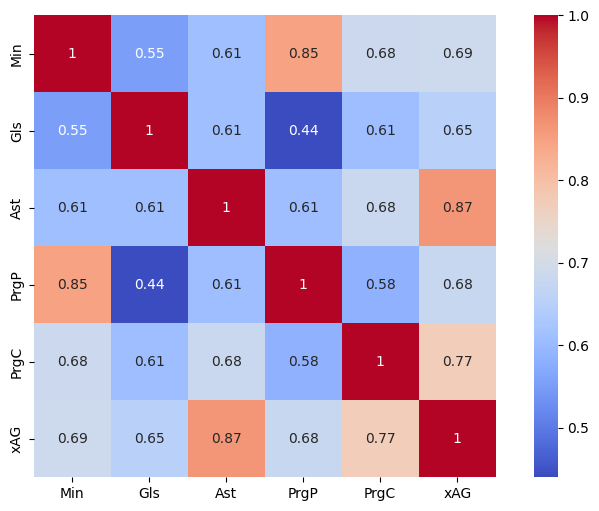

In [43]:
#Seleccionamos aquellas variables con correlaciones significativas
#Además descartamos aquellas que aunque tienen una alta correlación pueden incluir duplicidades que no nos interesa estudiar (por ejemplo: Ast + Gls)
#También descartamos aquellas que pudieran tener una correlación significativa pero no sean relevantes para el estudio (por ejemplo, Pkatt)
matriz_correlacion = mf_players[["Min", "Gls", "Ast", "PrgP", "PrgC", "xAG"]].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', square=True)

### Decisión sobre el grupo de estudio

In [44]:
unique_mf_players[["Min", "Gls", "Ast", "PrgP", "PrgC", "xAG"]].describe()

,Min,Gls,Ast,PrgP,PrgC,xAG
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,1243.256591,1.337434,1.342707,71.110721,20.087873,1.358699
std,992.452208,2.171037,1.987714,69.365865,22.018223,1.767030
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,199.000000,0.000000,0.000000,9.000000,3.000000,0.100000
50%,1221.000000,0.000000,0.000000,60.000000,14.000000,0.700000
75%,2090.000000,2.000000,2.000000,105.000000,29.000000,1.800000
max,3302.000000,19.000000,11.000000,392.000000,151.000000,11.500000


In [45]:
df_mf[["Min", "Gls", "Ast", "PrgP", "PrgC", "xAG"]].describe()

,Min,Gls,Ast,PrgP,PrgC,xAG
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,1099.941799,0.835979,1.010582,49.026455,22.021164,1.093122
std,891.345356,1.391302,1.601161,48.702466,24.607117,1.332453
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,229.000000,0.000000,0.000000,7.000000,4.000000,0.100000
50%,938.000000,0.000000,0.000000,38.000000,14.000000,0.600000
75%,1835.000000,1.000000,2.000000,76.000000,32.000000,1.600000
max,3289.000000,7.000000,10.000000,302.000000,131.000000,8.100000


In [46]:
fw_mf[["Min", "Gls", "Ast", "PrgP", "PrgC", "xAG"]].describe()

,Min,Gls,Ast,PrgP,PrgC,xAG
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000
mean,992.384071,2.656637,1.789381,39.240708,31.111504,1.797345
std,825.280491,3.336715,2.387147,41.878354,33.178380,2.054931
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,269.000000,0.000000,0.000000,8.000000,7.000000,0.300000
50%,781.000000,2.000000,1.000000,26.000000,19.000000,1.200000
75%,1584.000000,4.000000,2.000000,56.000000,46.000000,2.600000
max,3156.000000,22.000000,14.000000,297.000000,218.000000,11.800000


In [47]:
#En un primer análisis de los estadísticos vemos como los defensas están prácticamente por debajo de los MF en todas las variables clave, por lo que, a priori, ya los vamos a descartar.

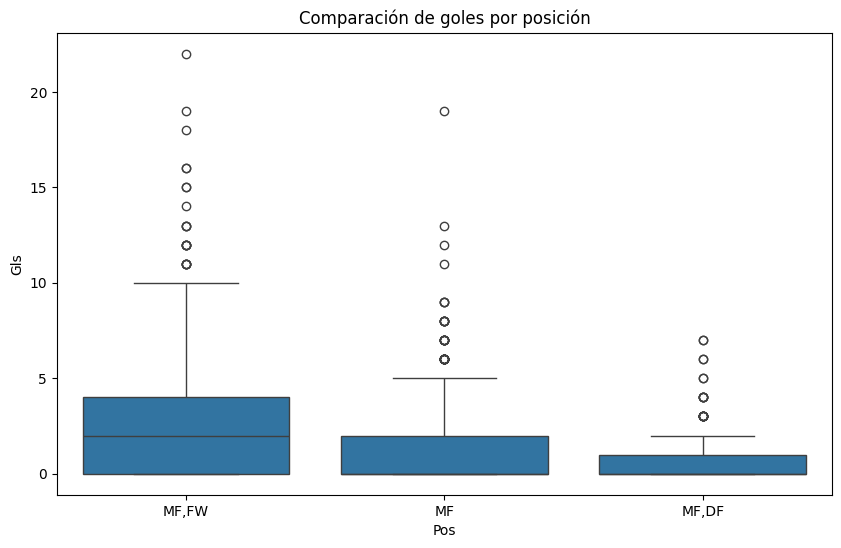

In [48]:
#Goles MF

plt.figure(figsize=(10, 6))
sns.boxplot(x='Pos', y='Gls', data=mf_players)
plt.title('Comparación de goles por posición')
plt.show()

La posición influye mucho en la capacidad goleadora de los jugadores. Aquellos que juegan más adelantados (MF,FW) tienden a marcar más goles, mientras que los que combinan funciones defensivas (MF,DF) tienen un rendimiento goleador más bajo.

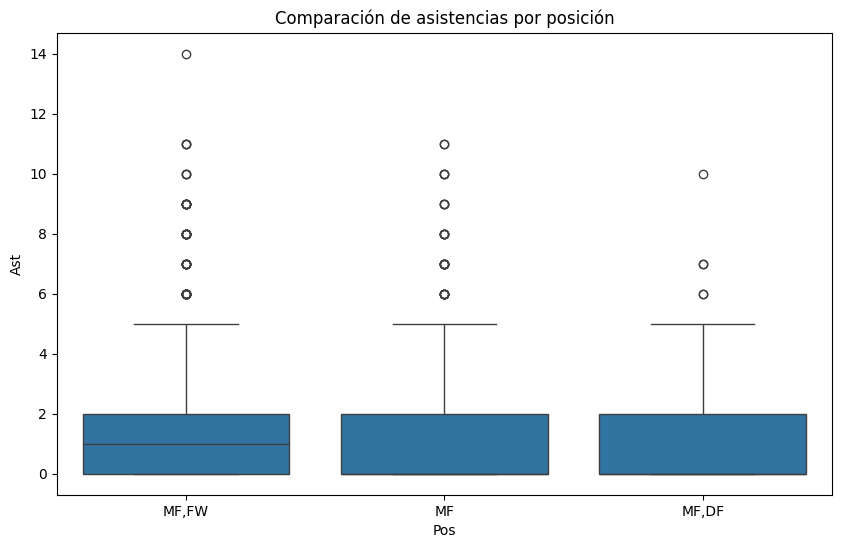

In [49]:
#Asistencias

plt.figure(figsize=(10, 6))
sns.boxplot(x='Pos', y='Ast', data=mf_players)
plt.title('Comparación de asistencias por posición')
plt.show()

Los tres grupos siguen una distribución similar en cuanto al número total de asistencias, si bien es cierto que los que tienen posiciones más adelantadas sitúan su mediana por encima del resto, probablemente por su cercania a las posiciones de gol. 

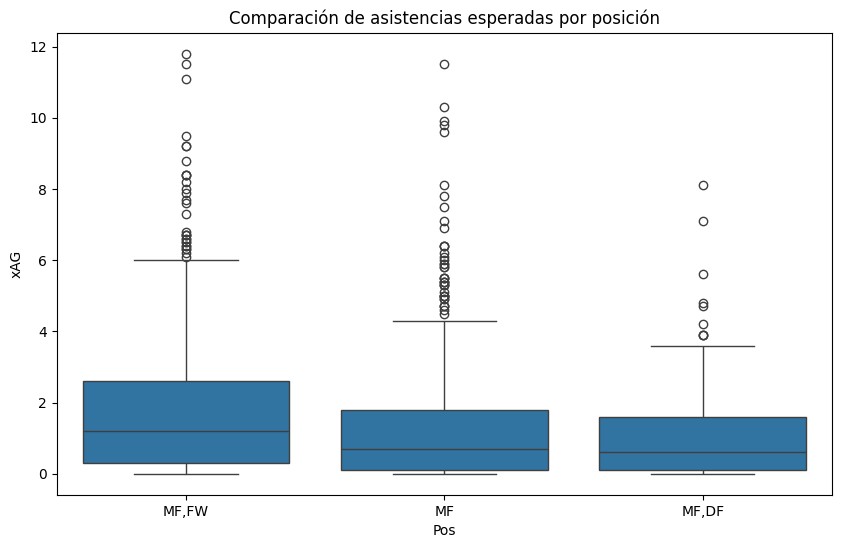

In [50]:
#Asistencias esperadas

plt.figure(figsize=(10, 6))
sns.boxplot(x='Pos', y='xAG', data=mf_players)
plt.title('Comparación de asistencias esperadas por posición')
plt.show()

Los jugadores que ocupan posiciones más avanzadas (MF,FW) tienden a tener mayores asistencias esperadas (xAG), con una mediana ligeramente superior a MF, mientras que los que combinan el mediocampo con roles más defensivos (MF,DF) tienen un menor impacto en este aspecto.

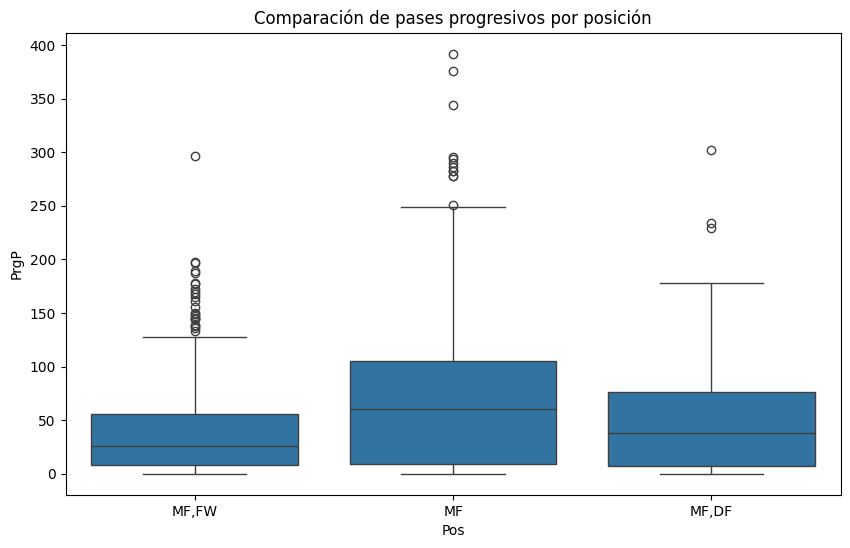

In [51]:
#Pases progresivos

plt.figure(figsize=(10, 6))
sns.boxplot(x='Pos', y='PrgP', data=mf_players)
plt.title('Comparación de pases progresivos por posición')
plt.show()

Este análisis sugiere que los jugadores en la posición de MF tienen un papel más prominente en la creación y progresión del juego a través de pases, mientras que los jugadores con posiciones mixtas tienden a tener una menor contribución en este aspecto, posiblemente debido a diferentes roles tácticos.

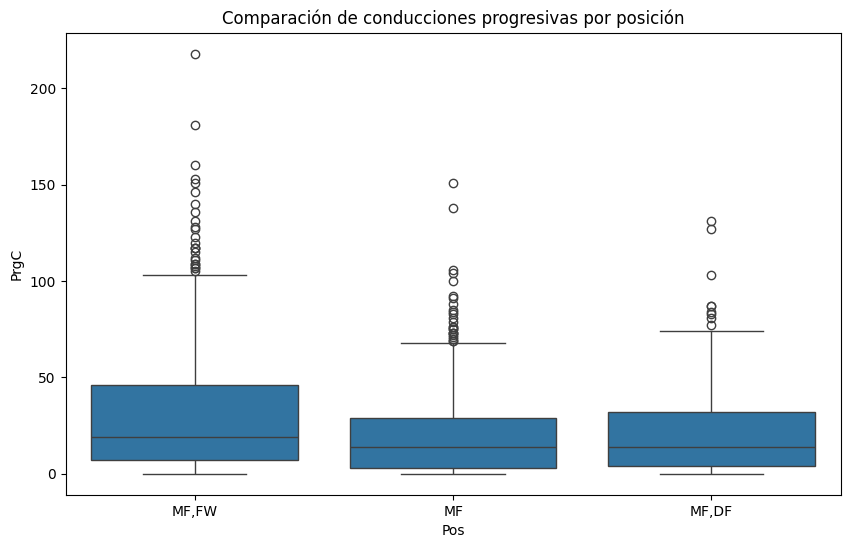

In [52]:
#Conducciones progresivas

plt.figure(figsize=(10, 6))
sns.boxplot(x='Pos', y='PrgC', data=mf_players)
plt.title('Comparación de conducciones progresivas por posición')
plt.show()

 Los jugadores que ocupan posiciones más ofensivas (MF,FW) son los que más avanzan con el balón, aunque no de forma extraordinariamente significativa en comparación con los MF. No obstannte, hay una gran cantidad de outliers, con algunos jugadores alcanzando hasta más de 200 conducciones progresivas, lo que muestra que algunos destacan significativamente.

### Conclusión final

En primer lugar, descartamos los jugadores que doblan posiciones más defensivas por estar por debajo en todas las comparaciones.

Por otro lado, no buscamos un perfil goleador, aunque siempre es bienvenido. Pese a que los MF,FW tiene más capacidad goleadora, no es algo excesivamente relevante en cuanto a las comparaciones establecidas entre los MF puros y los MF,FW. El Real Madrid tiene jugadores ofensivos de primer nivel con muchísima capacidad goleadora. Estas posiciones además están muy bien representadas con diferentes alternativas. 

Por lo tanto, como el enfoque principal es un organizador del juego clásico, como Kroos, con menos énfasis en la contribución directa al ataque, entonces **nos focalizaremops únicamente en "MF" puros para garantizar que cumplan con este rol más definido de mediocampista central**. Dado que Toni Kroos es un organizador y distribuidor con una gran capacidad para controlar el ritmo del juego, parece que **los MF puros se acercarían más a ese perfil**. 

In [53]:
#Prueba de Significancia (no realizada):
#Para validar si las diferencias en las métricas clave entre mediocentros puros y los jugadores con múltiples posiciones son estadísticamente significativas
#from scipy.stats import ttest_ind
#t_stat, p_value = ttest_ind(unique_mf_players['PrgP'], fw_mf['PrgP'])

In [54]:
brahim = top_players.loc[top_players["Player"] == "Brahim Díaz"]
brahim

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,Gls_90,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90
705,Brahim Díaz,ma MAR,"FW,MF",Real Madrid,es La Liga,23.0,1999.0,31,18,1545,...,0.47,0.35,0.82,0.47,0.82,0.33,0.26,0.59,0.33,0.59


### MF duplicados

In [55]:
duplicados["Pos"].value_counts()

Pos
MF       58
FW,MF    34
MF,FW    23
MF,DF     3
DF,MF     2
Name: count, dtype: int64

In [56]:
mf_duplicados = duplicados[duplicados["Pos"] == "MF"]

In [57]:
#Hay 58 duplicidades (jugadores que cambiaron de equipo durante la temporada pasada). 
#De un primer vistazo vemos como en general sus métircas son bastante pobres
#Salvo algunas excepciones (outliers) que quizá convendría tratar de forma separada si en los respectivos análisis posteriores salen como opción válida a tener en cuenta

### Creación de subgrupos de estudio por ligas

In [58]:
premier_league_mf = unique_mf_players[unique_mf_players["Comp"].str.contains("Premier")]

print(premier_league_mf.shape)

premier_league_mf[["Min", "Gls", "Ast", "PrgP", "PrgC", "xAG"]].describe()

(113, 36)


,Min,Gls,Ast,PrgP,PrgC,xAG
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,1274.539823,1.415929,1.566372,73.840708,19.672566,1.616814
std,1062.665450,2.132762,2.419696,76.553502,20.528048,2.175837
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,212.000000,0.000000,0.000000,5.000000,3.000000,0.100000
50%,1161.000000,1.000000,0.000000,56.000000,14.000000,0.800000
75%,2120.000000,2.000000,2.000000,107.000000,28.000000,2.100000
max,3263.000000,9.000000,10.000000,376.000000,91.000000,11.500000


In [59]:
laliga_mf = unique_mf_players[unique_mf_players["Comp"].str.contains("Liga")]

print(laliga_mf.shape)

laliga_mf[["Min", "Gls", "Ast", "PrgP", "PrgC", "xAG"]].describe()

(128, 36)


,Min,Gls,Ast,PrgP,PrgC,xAG
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,1279.640625,1.226562,1.304688,73.867188,20.648438,1.344531
std,1002.268763,2.276947,1.942312,71.457644,22.476090,1.731269
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,289.500000,0.000000,0.000000,12.250000,2.000000,0.100000
50%,1351.000000,0.000000,0.000000,60.000000,14.000000,0.750000
75%,2107.250000,2.000000,2.000000,116.250000,29.250000,1.750000
max,3302.000000,19.000000,9.000000,296.000000,104.000000,10.300000


In [60]:
ligue1_mf = unique_mf_players[unique_mf_players["Comp"].str.contains("Ligue")]

print(ligue1_mf.shape)

ligue1_mf[["Min", "Gls", "Ast", "PrgP", "PrgC", "xAG"]].describe()

(108, 36)


,Min,Gls,Ast,PrgP,PrgC,xAG
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,1164.444444,1.157407,1.009259,73.500000,18.833333,1.232407
std,902.093684,1.914832,1.537660,64.693454,19.216669,1.474128
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,242.250000,0.000000,0.000000,12.750000,2.000000,0.100000
50%,1208.500000,0.000000,0.000000,72.500000,14.000000,0.750000
75%,1950.500000,1.000000,2.000000,105.000000,28.000000,1.800000
max,3022.000000,9.000000,8.000000,286.000000,106.000000,6.900000


In [61]:
bundesliga_mf = unique_mf_players[unique_mf_players["Comp"].str.contains("Bundesliga")]

print(bundesliga_mf.shape)

bundesliga_mf[["Min", "Gls", "Ast", "PrgP", "PrgC", "xAG"]].describe()

(90, 36)


,Min,Gls,Ast,PrgP,PrgC,xAG
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,1205.833333,1.366667,1.666667,66.688889,20.400000,1.492222
std,960.332822,2.035914,2.370227,70.341645,26.673136,2.073548
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,133.500000,0.000000,0.000000,8.250000,2.000000,0.100000
50%,1272.000000,1.000000,1.000000,56.000000,14.000000,0.850000
75%,2050.500000,2.000000,2.000000,93.750000,26.000000,2.050000
max,2914.000000,11.000000,11.000000,392.000000,151.000000,9.900000


In [62]:
serie_a_mf = unique_mf_players[unique_mf_players["Comp"].str.contains("Serie")]

print(serie_a_mf.shape)

serie_a_mf[["Min", "Gls", "Ast", "PrgP", "PrgC", "xAG"]].describe()

(130, 36)


,Min,Gls,Ast,PrgP,PrgC,xAG
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,1271.623077,1.507692,1.238462,67.100000,20.723077,1.160769
std,1023.255795,2.392644,1.593611,64.319678,21.725923,1.339530
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,201.500000,0.000000,0.000000,9.250000,4.000000,0.100000
50%,1183.000000,0.500000,1.000000,51.000000,14.000000,0.700000
75%,2094.000000,2.000000,2.000000,117.000000,31.000000,1.600000
max,3282.000000,13.000000,8.000000,278.000000,92.000000,5.900000


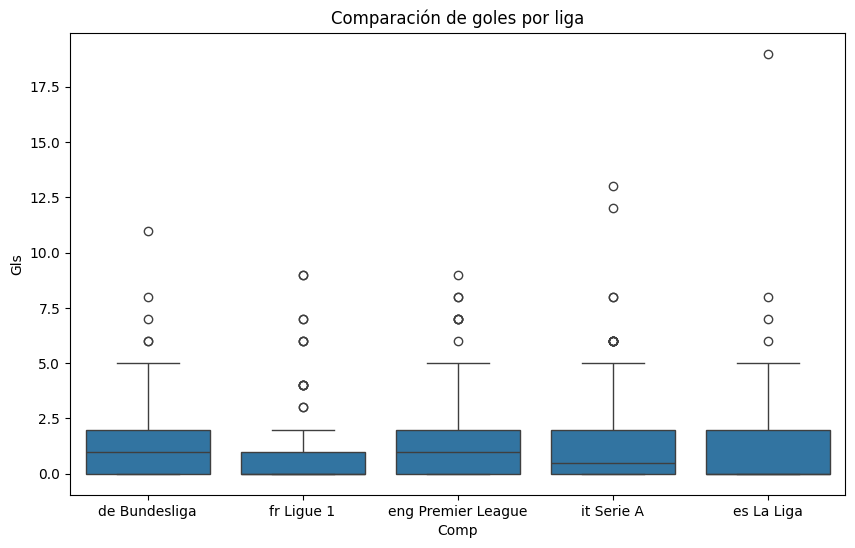

In [63]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Comp', y='Gls', data=unique_mf_players)
plt.title('Comparación de goles por liga')
plt.show()

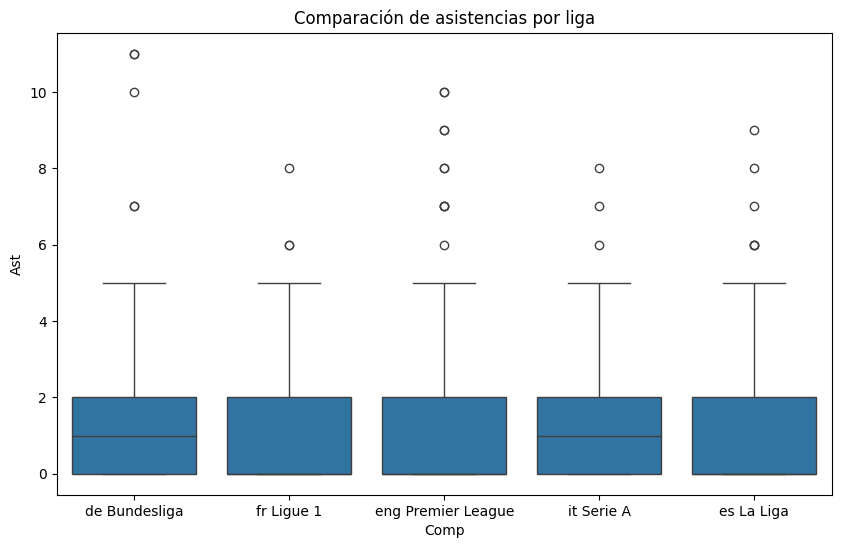

In [64]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Comp', y='Ast', data=unique_mf_players)
plt.title('Comparación de asistencias por liga')
plt.show()

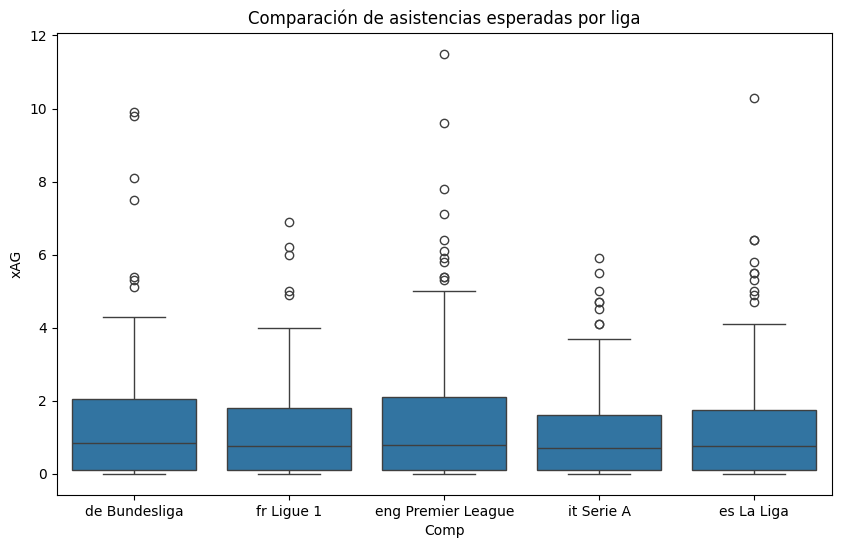

In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Comp', y='xAG', data=unique_mf_players)
plt.title('Comparación de asistencias esperadas por liga')
plt.show()

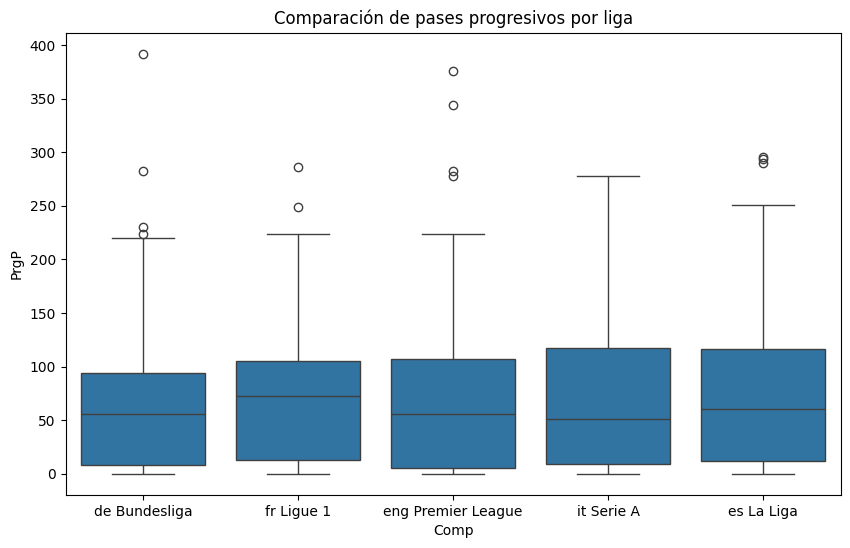

In [66]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Comp', y='PrgP', data=unique_mf_players)
plt.title('Comparación de pases progresivos por liga')
plt.show()

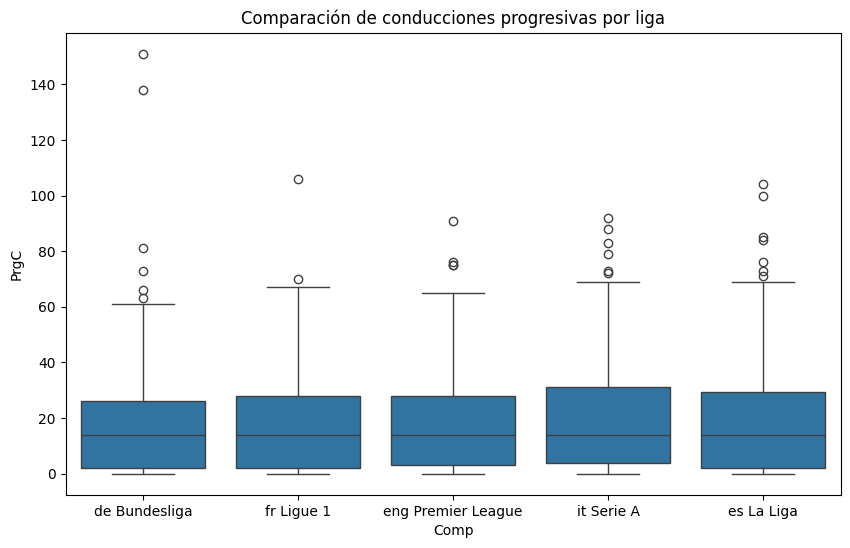

In [67]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Comp', y='PrgC', data=unique_mf_players)
plt.title('Comparación de conducciones progresivas por liga')
plt.show()

**Conclusión:** Apenas existen diferencias significativas entre las distribuciones delas variables estudiadas para los MF de las cinco grandes ligas. En todas ellas vemos valores atípicos para todas las variables. Quizá sea interesante estudiar quienes son estos jugadores. 

### Identificación de candidatos para cada variable

In [68]:
#Identificación de jugadores por encima de la media. 
# ¿Por qué la media y no la mediana? Porque en todas las ligas hay valores extremos que estiran la media hacia arriba y necesitamos buscar a esos jugadores excepcionales para el Real Madird, 
# cambiaría si fuera para otro equipo de menor nivel, donde quizá sí habría que establecer la mediana

In [69]:
mf_means = unique_mf_players.groupby("Comp").agg({"Gls": "mean", "Ast": "mean", "xAG": "mean", "PrgP": "mean", "PrgC": "mean"})

mf_means

,Gls,Ast,xAG,PrgP,PrgC
Comp,,,,,
de Bundesliga,1.366667,1.666667,1.492222,66.688889,20.400000
eng Premier League,1.415929,1.566372,1.616814,73.840708,19.672566
es La Liga,1.226562,1.304688,1.344531,73.867188,20.648438
fr Ligue 1,1.157407,1.009259,1.232407,73.500000,18.833333
it Serie A,1.507692,1.238462,1.160769,67.100000,20.723077


In [70]:
mf_complete_means = unique_mf_players.merge(mf_means, on="Comp")

mf_complete_means

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90,Gls_y,Ast_y,xAG_y,PrgP_y,PrgC_y
0,Paxten Aaronson,us USA,MF,Eint Frankfurt,de Bundesliga,19.0,2003.0,7,1,101,...,0.11,0.07,0.19,0.11,0.19,1.366667,1.666667,1.492222,66.688889,20.400000
1,Salis Abdul Samed,gh GHA,MF,Lens,fr Ligue 1,23.0,2000.0,27,17,1519,...,0.05,0.03,0.08,0.05,0.08,1.157407,1.009259,1.232407,73.500000,18.833333
2,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,30.0,1993.0,33,32,2860,...,0.04,0.07,0.10,0.04,0.10,1.157407,1.009259,1.232407,73.500000,18.833333
3,Tyler Adams,us USA,MF,Bournemouth,eng Premier League,24.0,1999.0,3,1,121,...,0.00,0.06,0.06,0.00,0.06,1.415929,1.566372,1.616814,73.840708,19.672566
4,Yacine Adli,fr FRA,MF,Milan,it Serie A,23.0,2000.0,24,17,1407,...,0.02,0.14,0.16,0.02,0.16,1.507692,1.238462,1.160769,67.100000,20.723077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,Piotr Zieliński,pl POL,MF,Napoli,it Serie A,29.0,1994.0,28,23,1924,...,0.12,0.16,0.28,0.08,0.24,1.507692,1.238462,1.160769,67.100000,20.723077
565,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,24.0,1999.0,31,29,2654,...,0.09,0.05,0.14,0.09,0.14,1.226562,1.304688,1.344531,73.867188,20.648438
566,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,25.0,1997.0,13,10,868,...,0.10,0.01,0.11,0.10,0.11,1.507692,1.238462,1.160769,67.100000,20.723077
567,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,24.0,1998.0,35,35,3091,...,0.22,0.28,0.50,0.17,0.45,1.415929,1.566372,1.616814,73.840708,19.672566


In [71]:
#Filtramos jugadores de cada liga que estén por encima de su media de goles

superan_media_goles = mf_complete_means[mf_complete_means["Gls_x"] > mf_complete_means["Gls_y"]]

superan_media_goles_sorted = superan_media_goles.sort_values(by=["Comp", "Gls_x"], ascending=[True, False])

superan_media_goles_sorted[["Player", "Age", "Squad", "Comp", "Gls_x", "Gls_y", "Min"]]

,Player,Age,Squad,Comp,Gls_x,Gls_y,Min
557,Florian Wirtz,20.0,Leverkusen,de Bundesliga,11,1.366667,2372
493,Xavi Simons,20.0,RB Leipzig,de Bundesliga,8,1.366667,2653
514,Kevin Stöger,29.0,Bochum,de Bundesliga,7,1.366667,2668
194,Leon Goretzka,28.0,Bayern Munich,de Bundesliga,6,1.366667,2241
438,Rocco Reitz,21.0,Gladbach,de Bundesliga,6,1.366667,2136
...,...,...,...,...,...,...,...
412,Martín Payero,24.0,Udinese,it Serie A,2,1.507692,1796
516,Ibrahim Sulemana,20.0,Cagliari,it Serie A,2,1.507692,1339
523,Morten Thorsby,27.0,Genoa,it Serie A,2,1.507692,1157
551,Walace,28.0,Udinese,it Serie A,2,1.507692,3238


In [72]:
goles_bundesliga_top_5 = superan_media_goles_sorted[superan_media_goles_sorted['Comp'] == 'de Bundesliga'].head(5)
goles_laliga_top_5 = superan_media_goles_sorted[superan_media_goles_sorted['Comp'] == 'es La Liga'].head(5)
goles_seriea_top_5 = superan_media_goles_sorted[superan_media_goles_sorted['Comp'] == 'it Serie A'].head(5)
goles_ligue1_top_5 = superan_media_goles_sorted[superan_media_goles_sorted['Comp'] == 'fr Ligue 1'].head(5)
goles_premier_top_5 = superan_media_goles_sorted[superan_media_goles_sorted['Comp'] == 'eng Premier League'].head(5)

goles_bundesliga_top_5[["Player", "Age", "Squad", "Comp", "Ast_x", "Ast_y", "Min"]]

,Player,Age,Squad,Comp,Ast_x,Ast_y,Min
557,Florian Wirtz,20.0,Leverkusen,de Bundesliga,11,1.666667,2372
493,Xavi Simons,20.0,RB Leipzig,de Bundesliga,11,1.666667,2653
514,Kevin Stöger,29.0,Bochum,de Bundesliga,10,1.666667,2668
194,Leon Goretzka,28.0,Bayern Munich,de Bundesliga,7,1.666667,2241
438,Rocco Reitz,21.0,Gladbach,de Bundesliga,3,1.666667,2136


In [73]:
#repetir eso para cada métrica
#representarlo visualmente (o no)
#Seleccionar coincidencias de jugadores en todas las métricas para crear un pool final

In [ ]:
#Filtramos jugadores de cada liga que estén por encima de su media de asistencias

superan_media_asistencias = mf_complete_means[mf_complete_means["Ast_x"] > mf_complete_means["Ast_y"]]

superan_media_asistencias_sorted = superan_media_asistencias.sort_values(by=["Comp", "Ast_x"], ascending=[True, False])

superan_media_asistencias_sorted[["Player", "Age", "Squad", "Comp", "Ast_x", "Ast_y", "Min"]]

,Player,Age,Squad,Comp,Ast_x,Ast_y,Min
493,Xavi Simons,20.0,RB Leipzig,de Bundesliga,11,1.666667,2653
557,Florian Wirtz,20.0,Leverkusen,de Bundesliga,11,1.666667,2372
514,Kevin Stöger,29.0,Bochum,de Bundesliga,10,1.666667,2668
194,Leon Goretzka,28.0,Bayern Munich,de Bundesliga,7,1.666667,2241
220,Jonas Hofmann,31.0,Leverkusen,de Bundesliga,7,1.666667,2204
...,...,...,...,...,...,...,...
490,Suat Serdar,26.0,Hellas Verona,it Serie A,2,1.238462,1659
515,Kevin Strootman,33.0,Genoa,it Serie A,2,1.238462,1207
523,Morten Thorsby,27.0,Genoa,it Serie A,2,1.238462,1157
561,Andre-Frank Zambo Anguissa,27.0,Napoli,it Serie A,2,1.238462,2786


In [75]:
#Filtramos jugadores de cada liga que estén por encima de su media de asistencias esperadas

superan_media_asistencias_esperadas = mf_complete_means[mf_complete_means["xAG_x"] > mf_complete_means["xAG_y"]]

superan_media_asistencias_esperadas_sorted = superan_media_asistencias_esperadas.sort_values(by=["Comp", "xAG_x"], ascending=[True, False])

superan_media_asistencias_esperadas_sorted[["Player", "Age", "Squad", "Comp", "xAG_x", "xAG_y", "Min"]]

,Player,Age,Squad,Comp,xAG_x,xAG_y,Min
514,Kevin Stöger,29.0,Bochum,de Bundesliga,9.9,1.492222,2668
493,Xavi Simons,20.0,RB Leipzig,de Bundesliga,9.8,1.492222,2653
220,Jonas Hofmann,31.0,Leverkusen,de Bundesliga,8.1,1.492222,2204
557,Florian Wirtz,20.0,Leverkusen,de Bundesliga,7.5,1.492222,2372
391,Dani Olmo,25.0,RB Leipzig,de Bundesliga,5.4,1.492222,1449
...,...,...,...,...,...,...,...
293,Manuel Locatelli,25.0,Juventus,it Serie A,1.4,1.160769,3008
490,Suat Serdar,26.0,Hellas Verona,it Serie A,1.4,1.160769,1659
523,Morten Thorsby,27.0,Genoa,it Serie A,1.4,1.160769,1157
292,Stanislav Lobotka,28.0,Napoli,it Serie A,1.3,1.160769,3282


In [76]:
#Filtramos jugadores de cada liga que estén por encima de su media de pases progresivos

superan_media_pases_prog = mf_complete_means[mf_complete_means["PrgP_x"] > mf_complete_means["PrgP_y"]]

superan_media_pases_prog_sorted = superan_media_pases_prog.sort_values(by=["Comp", "PrgP_x"], ascending=[True, False])

superan_media_pases_prog_sorted[["Player", "Age", "Squad", "Comp", "PrgP_x", "PrgP_y", "Min"]]

,Player,Age,Squad,Comp,PrgP_x,PrgP_y,Min
558,Granit Xhaka,30.0,Leverkusen,de Bundesliga,392.0,66.688889,2821
514,Kevin Stöger,29.0,Bochum,de Bundesliga,283.0,66.688889,2668
482,Xaver Schlager,25.0,RB Leipzig,de Bundesliga,230.0,66.688889,2477
557,Florian Wirtz,20.0,Leverkusen,de Bundesliga,224.0,66.688889,2372
513,Angelo Stiller,22.0,Stuttgart,de Bundesliga,220.0,66.688889,2694
...,...,...,...,...,...,...,...
412,Martín Payero,24.0,Udinese,it Serie A,71.0,67.100000,1796
80,Marco Brescianini,23.0,Frosinone,it Serie A,70.0,67.100000,2321
100,Danilo Cataldi,28.0,Lazio,it Serie A,69.0,67.100000,1361
57,Ismaël Bennacer,25.0,Milan,it Serie A,68.0,67.100000,1151


In [77]:
#Filtramos jugadores de cada liga que estén por encima de su media de pases progresivos

superan_media_pases_prog = mf_complete_means[mf_complete_means["PrgP_x"] > mf_complete_means["PrgP_y"]]

superan_media_pases_prog_sorted = superan_media_pases_prog.sort_values(by=["Comp", "PrgP_x"], ascending=[True, False])

superan_media_pases_prog_sorted[["Player", "Age", "Squad", "Comp", "PrgP_x", "PrgP_y", "Min"]]

,Player,Age,Squad,Comp,PrgP_x,PrgP_y,Min
558,Granit Xhaka,30.0,Leverkusen,de Bundesliga,392.0,66.688889,2821
514,Kevin Stöger,29.0,Bochum,de Bundesliga,283.0,66.688889,2668
482,Xaver Schlager,25.0,RB Leipzig,de Bundesliga,230.0,66.688889,2477
557,Florian Wirtz,20.0,Leverkusen,de Bundesliga,224.0,66.688889,2372
513,Angelo Stiller,22.0,Stuttgart,de Bundesliga,220.0,66.688889,2694
...,...,...,...,...,...,...,...
412,Martín Payero,24.0,Udinese,it Serie A,71.0,67.100000,1796
80,Marco Brescianini,23.0,Frosinone,it Serie A,70.0,67.100000,2321
100,Danilo Cataldi,28.0,Lazio,it Serie A,69.0,67.100000,1361
57,Ismaël Bennacer,25.0,Milan,it Serie A,68.0,67.100000,1151


In [78]:
#Filtramos jugadores de cada liga que estén por encima de su media de conducciones progresivas

superan_media_cond_prog = mf_complete_means[mf_complete_means["PrgC_x"] > mf_complete_means["PrgC_y"]]

superan_media_cond_prog_sorted = superan_media_cond_prog.sort_values(by=["Comp", "PrgC_x"], ascending=[True, False])

superan_media_cond_prog_sorted

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90,Gls_y,Ast_y,xAG_y,PrgP_y,PrgC_y
493,Xavi Simons,nl NED,MF,RB Leipzig,de Bundesliga,20.0,2003.0,32,32,2653,...,0.28,0.33,0.61,0.23,0.56,1.366667,1.666667,1.492222,66.688889,20.400000
557,Florian Wirtz,de GER,MF,Leverkusen,de Bundesliga,20.0,2003.0,32,26,2372,...,0.34,0.29,0.62,0.31,0.60,1.366667,1.666667,1.492222,66.688889,20.400000
514,Kevin Stöger,at AUT,MF,Bochum,de Bundesliga,29.0,1993.0,32,32,2668,...,0.21,0.33,0.54,0.10,0.44,1.366667,1.666667,1.492222,66.688889,20.400000
482,Xaver Schlager,at AUT,MF,RB Leipzig,de Bundesliga,25.0,1997.0,29,29,2477,...,0.04,0.09,0.13,0.04,0.13,1.366667,1.666667,1.492222,66.688889,20.400000
194,Leon Goretzka,de GER,MF,Bayern Munich,de Bundesliga,28.0,1995.0,30,25,2241,...,0.20,0.21,0.41,0.20,0.41,1.366667,1.666667,1.492222,66.688889,20.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,Manuel Locatelli,it ITA,MF,Juventus,it Serie A,25.0,1998.0,36,34,3008,...,0.04,0.04,0.08,0.04,0.08,1.507692,1.238462,1.160769,67.100000,20.723077
327,Răzvan Marin,ro ROU,MF,Empoli,it Serie A,27.0,1996.0,30,20,1818,...,0.05,0.15,0.20,0.05,0.20,1.507692,1.238462,1.160769,67.100000,20.723077
349,Arthur Melo,br BRA,MF,Fiorentina,it Serie A,26.0,1996.0,33,23,1986,...,0.05,0.08,0.13,0.01,0.09,1.507692,1.238462,1.160769,67.100000,20.723077
366,Nikola Moro,hr CRO,MF,Bologna,it Serie A,25.0,1998.0,23,10,840,...,0.08,0.04,0.12,0.08,0.12,1.507692,1.238462,1.160769,67.100000,20.723077


In [79]:
# Agrupar por liga y seleccionar los 5 primeros de cada una por goles
top_5_por_liga_goles = superan_media_goles_sorted.groupby("Comp").apply(lambda x: x.nlargest(5, "Gls_x")).reset_index(drop=True)

C:\Users\Propietario\AppData\Local\Temp\ipykernel_6156\435926018.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_por_liga_goles = superan_media_goles_sorted.groupby("Comp").apply(lambda x: x.nlargest(5, "Gls_x")).reset_index(drop=True)


In [80]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

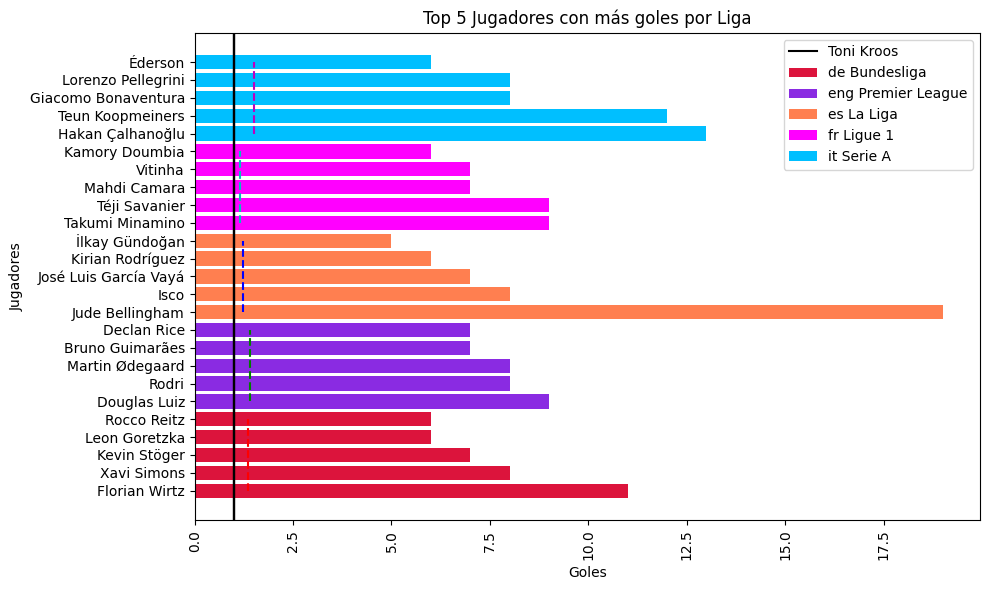

In [131]:
# Ordenar a los jugadores por liga
top_5_por_liga_goles = top_5_por_liga_goles.sort_values(by="Comp")

# Definir colores específicos para cada liga
colores_ligas = {
    'de Bundesliga': 'crimson',
    'eng Premier League': 'blueviolet',
    'es La Liga': 'coral',
    'it Serie A': 'deepskyblue',
    'fr Ligue 1': 'fuchsia'}

goles_kroos = 1

plt.figure(figsize=(10, 6))

# Dibujar las barras con colores según la liga
for i, liga in enumerate(top_5_por_liga_goles['Comp'].unique()):
    # Filtrar los jugadores de la liga actual
    jugadores_liga = top_5_por_liga_goles[top_5_por_liga_goles['Comp'] == liga]
    
    # Dibujar las barras para los jugadores de esa liga, asignando un color específico
    plt.barh(jugadores_liga['Player'], jugadores_liga['Gls_x'], label=f'{liga}', color=colores_ligas[liga])

# Definir una lista de colores para cada liga
colores = ['r', 'g', 'b', 'c', 'm']  # Colores diferentes para cada liga

# Dibujar la media de la liga para cada grupo de jugadores de la misma liga
posiciones = np.arange(len(top_5_por_liga_goles))  # Posiciones de los jugadores en el gráfico

for i, liga in enumerate(top_5_por_liga_goles['Comp'].unique()):
    # Filtrar los jugadores de la liga actual
    jugadores_liga = top_5_por_liga_goles[top_5_por_liga_goles['Comp'] == liga]
    
    # Obtener la media de goles para esa liga (de la columna que ya tienes)
    media_liga = jugadores_liga['Gls_y'].iloc[0]
    
    # Obtener el rango de posiciones para los jugadores de esa liga
    inicio = jugadores_liga.index.min()
    fin = jugadores_liga.index.max()
    
    # Dibujar una línea horizontal solo en la parte de los jugadores de esa liga, con un color diferente
    plt.vlines(x=media_liga, ymin=inicio, ymax=fin, colors=colores[i], linestyle='--')
    plt.axvline(x=goles_kroos, color='black', linestyle='-', label='_nolegend_')

plt.plot([], [], color='black', linestyle='-', label='Toni Kroos') 
plt.xticks(rotation=90)  # Rotar nombres de jugadores para que sean legibles
plt.xlabel('Goles')
plt.ylabel('Jugadores')
plt.title('Top 5 Jugadores con más goles por Liga')
plt.legend()

plt.tight_layout()
plt.show()

In [82]:
# Agrupar por liga y seleccionar los 5 primeros de cada una por asistencias
top_5_por_liga_asist = superan_media_asistencias_sorted.groupby("Comp").apply(lambda x: x.nlargest(5, "Ast_x")).reset_index(drop=True)

C:\Users\Propietario\AppData\Local\Temp\ipykernel_6156\2362180576.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_por_liga_asist = superan_media_asistencias_sorted.groupby("Comp").apply(lambda x: x.nlargest(5, "Ast_x")).reset_index(drop=True)


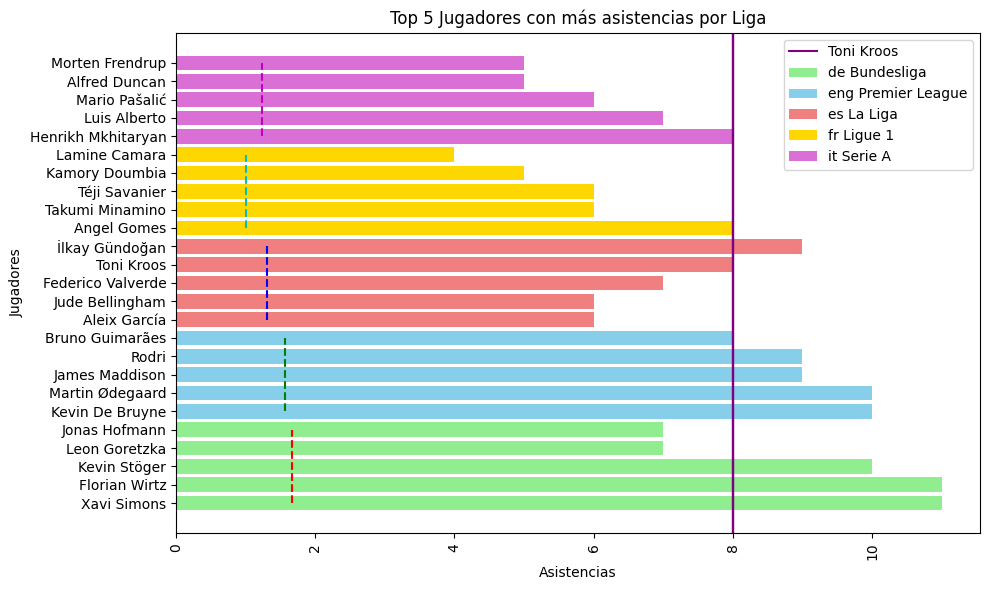

In [83]:
# Ordenar a los jugadores por liga
top_5_por_liga_asist = top_5_por_liga_asist.sort_values(by="Comp")

# Definir colores específicos para cada liga
colores_ligas = {
    'de Bundesliga': 'lightgreen',
    'eng Premier League': 'skyblue',
    'es La Liga': 'lightcoral',
    'it Serie A': 'orchid',
    'fr Ligue 1': 'gold'}

asist_kroos = 8

plt.figure(figsize=(10, 6))

# Dibujar las barras con colores según la liga
for i, liga in enumerate(top_5_por_liga_asist['Comp'].unique()):
    # Filtrar los jugadores de la liga actual
    jugadores_liga = top_5_por_liga_asist[top_5_por_liga_asist['Comp'] == liga]
    
    # Dibujar las barras para los jugadores de esa liga, asignando un color específico
    plt.barh(jugadores_liga['Player'], jugadores_liga['Ast_x'], label=f'{liga}', color=colores_ligas[liga])

# Definir una lista de colores para cada liga
colores = ['r', 'g', 'b', 'c', 'm']  # Colores diferentes para cada liga

# Dibujar la media de la liga para cada grupo de jugadores de la misma liga
posiciones = np.arange(len(top_5_por_liga_asist))  # Posiciones de los jugadores en el gráfico

for i, liga in enumerate(top_5_por_liga_asist['Comp'].unique()):
    # Filtrar los jugadores de la liga actual
    jugadores_liga = top_5_por_liga_asist[top_5_por_liga_asist['Comp'] == liga]
    
    # Obtener la media de goles para esa liga (de la columna que ya tienes)
    media_liga = jugadores_liga['Ast_y'].iloc[0]
    
    # Obtener el rango de posiciones para los jugadores de esa liga
    inicio = jugadores_liga.index.min()
    fin = jugadores_liga.index.max()
    
    # Dibujar una línea horizontal solo en la parte de los jugadores de esa liga, con un color diferente
    plt.vlines(x=media_liga, ymin=inicio, ymax=fin, colors=colores[i], linestyle='--')
    plt.axvline(x=asist_kroos, color='purple', linestyle='-', label='_nolegend_')

plt.plot([], [], color='purple', linestyle='-', label='Toni Kroos') 
plt.xticks(rotation=90)  # Rotar nombres de jugadores para que sean legibles
plt.xlabel('Asistencias')
plt.ylabel('Jugadores')
plt.title('Top 5 Jugadores con más asistencias por Liga')
plt.legend()

plt.tight_layout()
plt.show()

In [84]:
# Agrupar por liga y seleccionar los 5 primeros de cada una por asistencias esperadas
top_5_por_liga_xag = superan_media_asistencias_esperadas_sorted.groupby("Comp").apply(lambda x: x.nlargest(5, "xAG_x")).reset_index(drop=True)

C:\Users\Propietario\AppData\Local\Temp\ipykernel_6156\1836492312.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_por_liga_xag = superan_media_asistencias_esperadas_sorted.groupby("Comp").apply(lambda x: x.nlargest(5, "xAG_x")).reset_index(drop=True)


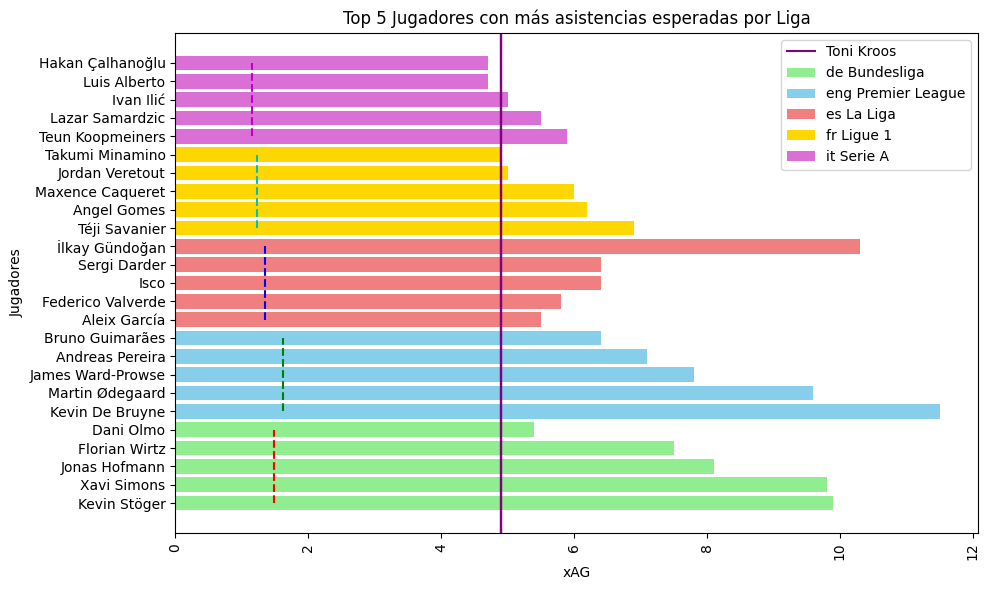

In [85]:
# Ordenar a los jugadores por liga
top_5_por_liga_xag = top_5_por_liga_xag.sort_values(by="Comp")

# Definir colores específicos para cada liga
colores_ligas = {
    'de Bundesliga': 'lightgreen',
    'eng Premier League': 'skyblue',
    'es La Liga': 'lightcoral',
    'it Serie A': 'orchid',
    'fr Ligue 1': 'gold'}

xag_kroos = 4.9

plt.figure(figsize=(10, 6))

# Dibujar las barras con colores según la liga
for i, liga in enumerate(top_5_por_liga_xag['Comp'].unique()):
    # Filtrar los jugadores de la liga actual
    jugadores_liga = top_5_por_liga_xag[top_5_por_liga_xag['Comp'] == liga]
    
    # Dibujar las barras para los jugadores de esa liga, asignando un color específico
    plt.barh(jugadores_liga['Player'], jugadores_liga['xAG_x'], label=f'{liga}', color=colores_ligas[liga])

# Definir una lista de colores para cada liga
colores = ['r', 'g', 'b', 'c', 'm']  # Colores diferentes para cada liga

# Dibujar la media de la liga para cada grupo de jugadores de la misma liga
posiciones = np.arange(len(top_5_por_liga_xag))  # Posiciones de los jugadores en el gráfico

for i, liga in enumerate(top_5_por_liga_xag['Comp'].unique()):
    # Filtrar los jugadores de la liga actual
    jugadores_liga = top_5_por_liga_xag[top_5_por_liga_xag['Comp'] == liga]
    
    # Obtener la media de goles para esa liga (de la columna que ya tienes)
    media_liga = jugadores_liga['xAG_y'].iloc[0]
    
    # Obtener el rango de posiciones para los jugadores de esa liga
    inicio = jugadores_liga.index.min()
    fin = jugadores_liga.index.max()
    
    # Dibujar una línea horizontal solo en la parte de los jugadores de esa liga, con un color diferente
    plt.vlines(x=media_liga, ymin=inicio, ymax=fin, colors=colores[i], linestyle='--')
    plt.axvline(x=xag_kroos, color='purple', linestyle='-', label='_nolegend_')

plt.plot([], [], color='purple', linestyle='-', label='Toni Kroos') 
plt.xticks(rotation=90)  # Rotar nombres de jugadores para que sean legibles
plt.xlabel('xAG')
plt.ylabel('Jugadores')
plt.title('Top 5 Jugadores con más asistencias esperadas por Liga')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Agrupar por liga y seleccionar los 5 primeros de cada una por PrgP
top_5_por_liga_prgp = superan_media_pases_prog_sorted.groupby("Comp").apply(lambda x: x.nlargest(5, "PrgP_x")).reset_index(drop=True)

C:\Users\Propietario\AppData\Local\Temp\ipykernel_6156\2529777962.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_por_liga_prgp = superan_media_pases_prog_sorted.groupby("Comp").apply(lambda x: x.nlargest(5, "PrgP_x")).reset_index(drop=True)


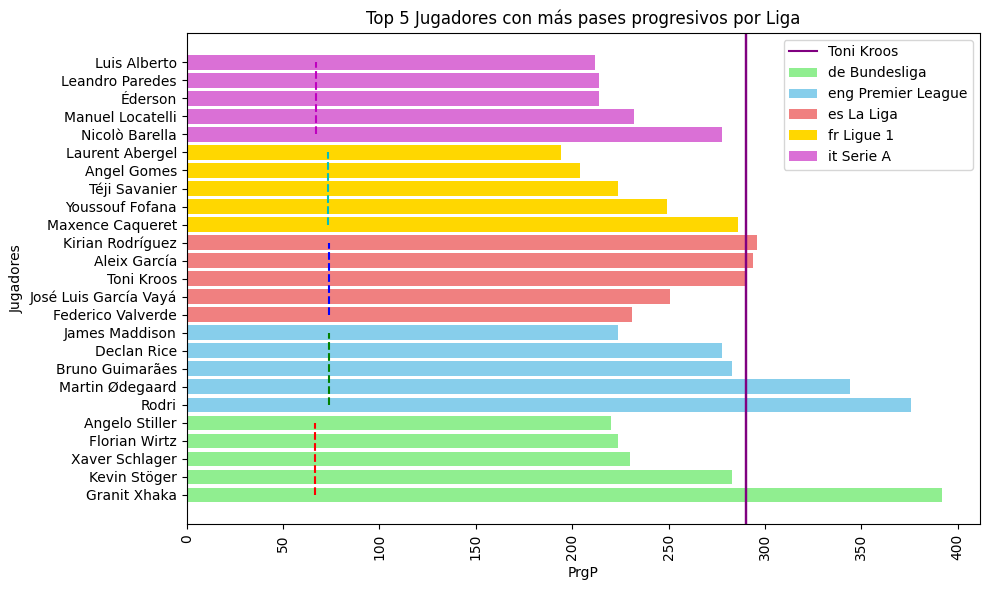

In [87]:
# Ordenar a los jugadores por liga
top_5_por_liga_prgp = top_5_por_liga_prgp.sort_values(by="Comp")

# Definir colores específicos para cada liga
colores_ligas = {
    'de Bundesliga': 'lightgreen',
    'eng Premier League': 'skyblue',
    'es La Liga': 'lightcoral',
    'it Serie A': 'orchid',
    'fr Ligue 1': 'gold'}

prgp_kroos = 290

plt.figure(figsize=(10, 6))

# Dibujar las barras con colores según la liga
for i, liga in enumerate(top_5_por_liga_prgp['Comp'].unique()):
    # Filtrar los jugadores de la liga actual
    jugadores_liga = top_5_por_liga_prgp[top_5_por_liga_prgp['Comp'] == liga]
    
    # Dibujar las barras para los jugadores de esa liga, asignando un color específico
    plt.barh(jugadores_liga['Player'], jugadores_liga['PrgP_x'], label=f'{liga}', color=colores_ligas[liga])

# Definir una lista de colores para cada liga
colores = ['r', 'g', 'b', 'c', 'm']  # Colores diferentes para cada liga

# Dibujar la media de la liga para cada grupo de jugadores de la misma liga
posiciones = np.arange(len(top_5_por_liga_prgp))  # Posiciones de los jugadores en el gráfico

for i, liga in enumerate(top_5_por_liga_prgp['Comp'].unique()):
    # Filtrar los jugadores de la liga actual
    jugadores_liga = top_5_por_liga_prgp[top_5_por_liga_prgp['Comp'] == liga]
    
    # Obtener la media de goles para esa liga (de la columna que ya tienes)
    media_liga = jugadores_liga['PrgP_y'].iloc[0]
    
    # Obtener el rango de posiciones para los jugadores de esa liga
    inicio = jugadores_liga.index.min()
    fin = jugadores_liga.index.max()
    
    # Dibujar una línea horizontal solo en la parte de los jugadores de esa liga, con un color diferente
    plt.vlines(x=media_liga, ymin=inicio, ymax=fin, colors=colores[i], linestyle='--')
    plt.axvline(x=prgp_kroos, color='purple', linestyle='-', label='_nolegend_')

plt.plot([], [], color='purple', linestyle='-', label='Toni Kroos') 
plt.xticks(rotation=90)  # Rotar nombres de jugadores para que sean legibles
plt.xlabel('PrgP')
plt.ylabel('Jugadores')
plt.title('Top 5 Jugadores con más pases progresivos por Liga')
plt.legend()

plt.tight_layout()
plt.show()

In [88]:
# Agrupar por liga y seleccionar los 5 primeros de cada una por PrgC
top_5_por_liga_prgc = superan_media_cond_prog_sorted.groupby("Comp").apply(lambda x: x.nlargest(5, "PrgC_x")).reset_index(drop=True)

C:\Users\Propietario\AppData\Local\Temp\ipykernel_6156\2215074449.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_por_liga_prgc = superan_media_cond_prog_sorted.groupby("Comp").apply(lambda x: x.nlargest(5, "PrgC_x")).reset_index(drop=True)


In [89]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

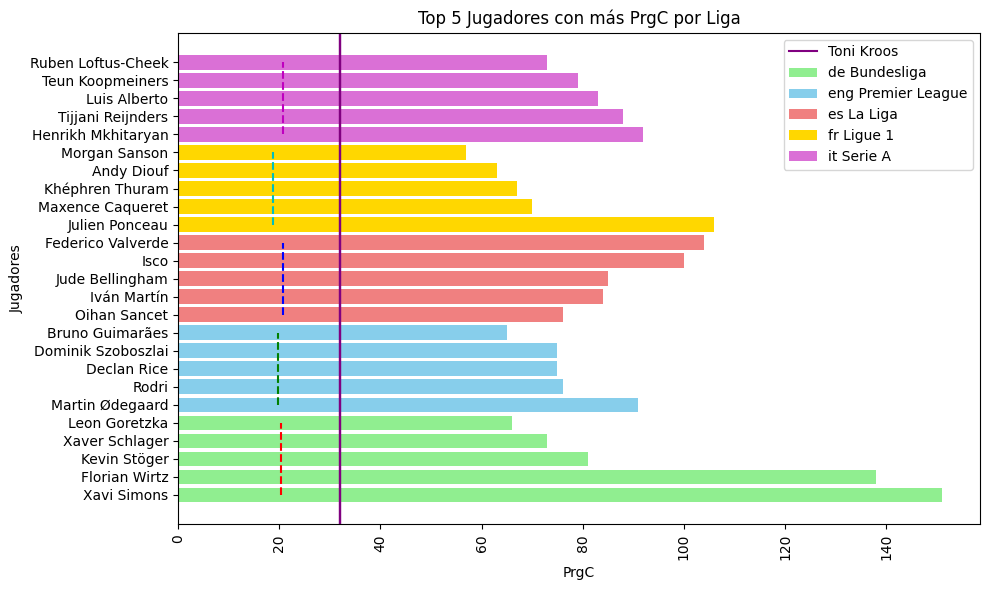

In [90]:
# Ordenar a los jugadores por liga
top_5_por_liga_prgc = top_5_por_liga_prgc.sort_values(by="Comp")

# Definir colores específicos para cada liga
colores_ligas = {
    'de Bundesliga': 'lightgreen',
    'eng Premier League': 'skyblue',
    'es La Liga': 'lightcoral',
    'it Serie A': 'orchid',
    'fr Ligue 1': 'gold'}

prgc_kroos = 32

plt.figure(figsize=(10, 6))

# Dibujar las barras con colores según la liga
for i, liga in enumerate(top_5_por_liga_prgc['Comp'].unique()):
    # Filtrar los jugadores de la liga actual
    jugadores_liga = top_5_por_liga_prgc[top_5_por_liga_prgc['Comp'] == liga]
    
    # Dibujar las barras para los jugadores de esa liga, asignando un color específico
    plt.barh(jugadores_liga['Player'], jugadores_liga['PrgC_x'], label=f'{liga}', color=colores_ligas[liga])

# Definir una lista de colores para cada liga
colores = ['r', 'g', 'b', 'c', 'm']  # Colores diferentes para cada liga

# Dibujar la media de la liga para cada grupo de jugadores de la misma liga
posiciones = np.arange(len(top_5_por_liga_prgc))  # Posiciones de los jugadores en el gráfico

for i, liga in enumerate(top_5_por_liga_prgc['Comp'].unique()):
    # Filtrar los jugadores de la liga actual
    jugadores_liga = top_5_por_liga_prgc[top_5_por_liga_prgc['Comp'] == liga]
    
    # Obtener la media de goles para esa liga (de la columna que ya tienes)
    media_liga = jugadores_liga['PrgC_y'].iloc[0]
    
    # Obtener el rango de posiciones para los jugadores de esa liga
    inicio = jugadores_liga.index.min()
    fin = jugadores_liga.index.max()
    
    # Dibujar una línea horizontal solo en la parte de los jugadores de esa liga, con un color diferente
    plt.vlines(x=media_liga, ymin=inicio, ymax=fin, colors=colores[i], linestyle='--')
    plt.axvline(x=prgc_kroos, color='purple', linestyle='-', label='_nolegend_')

plt.plot([], [], color='purple', linestyle='-', label='Toni Kroos') 
plt.xticks(rotation=90)  # Rotar nombres de jugadores para que sean legibles
plt.xlabel('PrgC')
plt.ylabel('Jugadores')
plt.title('Top 5 Jugadores con más PrgC por Liga')
plt.legend()

plt.tight_layout()
plt.show()

In [91]:
df_top_5_goles = pd.DataFrame(top_5_por_liga_goles)
df_top_5_asist = pd.DataFrame(top_5_por_liga_asist)
df_top_5_xag = pd.DataFrame(top_5_por_liga_xag)
df_top_5_prgp = pd.DataFrame(top_5_por_liga_prgp)
df_top_5_prgc = pd.DataFrame(top_5_por_liga_prgc)

In [92]:
df_top_5_goles["Métrica"] = "Goles" 
df_top_5_asist["Métrica"] = "Asistencias"
df_top_5_xag["Métrica"] = "xAG"
df_top_5_prgp["Métrica"] = "PrgP"
df_top_5_prgc["Métrica"] = "PrgC"

In [93]:
df_combinado = pd.concat([df_top_5_goles, df_top_5_asist, df_top_5_xag, df_top_5_prgp, df_top_5_prgc])

In [94]:
repeticiones = df_combinado['Player'].value_counts()

In [95]:
jugadores_repetidos = repeticiones[repeticiones > 1]

In [96]:
df_jugadores_repetidos = df_combinado[df_combinado['Player'].isin(jugadores_repetidos.index)]

df_jugadores_repetidos[["Player", "Comp", "Squad"]].value_counts()


Player                 Comp                Squad          
Florian Wirtz          de Bundesliga       Leverkusen         5
Bruno Guimarães        eng Premier League  Newcastle Utd      5
Martin Ødegaard        eng Premier League  Arsenal            5
Kevin Stöger           de Bundesliga       Bochum             5
Federico Valverde      es La Liga          Real Madrid        4
Luis Alberto           it Serie A          Lazio              4
Rodri                  eng Premier League  Manchester City    4
Xavi Simons            de Bundesliga       RB Leipzig         4
Téji Savanier          fr Ligue 1          Montpellier        4
Jude Bellingham        es La Liga          Real Madrid        3
Isco                   es La Liga          Betis              3
Aleix García           es La Liga          Girona             3
Angel Gomes            fr Ligue 1          Lille              3
Declan Rice            eng Premier League  Arsenal            3
İlkay Gündoğan         es La Liga          Ba

### Comparaciones Kroos vs candidatos

##### Florian Wirtz

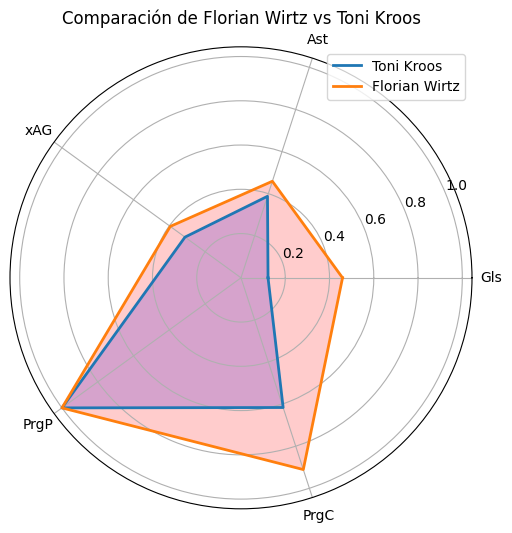

In [97]:
# Datos
metricas = ["Gls", "Ast", "xAG", "PrgP", "PrgC"]
valores_kroos = [1, 8, 4.9, 290, 32]
jugador = 'Florian Wirtz'
valores_jugador = [11, 11, 7.5, 224, 138]

# Aplicar el escalado logarítmico (log(1 + valor) para evitar log(0))
valores_kroos_log = np.log1p(valores_kroos)
valores_jugador_log = np.log1p(valores_jugador)

# Normalizar los valores logarítmicos
valores_kroos_log_normalizados = valores_kroos_log / np.max(valores_kroos_log)
valores_jugador_log_normalizados = valores_jugador_log / np.max(valores_jugador_log)

# Añadir el primer valor al final para cerrar el gráfico
valores_kroos_log_normalizados = np.append(valores_kroos_log_normalizados, valores_kroos_log_normalizados[0])
valores_jugador_log_normalizados = np.append(valores_jugador_log_normalizados, valores_jugador_log_normalizados[0])

# Generar ángulos igualmente espaciados para cada métrica
angulos = np.linspace(0, 2 * np.pi, len(metricas), endpoint=False).tolist()
angulos += angulos[:1]  # Añadir el primer ángulo al final para cerrar el gráfico

# Crear el gráfico
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Dibujar las líneas de cada jugador
ax.plot(angulos, valores_kroos_log_normalizados, linewidth=2, linestyle='solid', label='Toni Kroos')
ax.fill(angulos, valores_kroos_log_normalizados, 'b', alpha=0.2)

ax.plot(angulos, valores_jugador_log_normalizados, linewidth=2, linestyle='solid', label=jugador)
ax.fill(angulos, valores_jugador_log_normalizados, 'r', alpha=0.2)

# Añadir las etiquetas de las métricas
ax.set_xticks(angulos[:-1])  # Usar los primeros 5 ángulos (sin el duplicado)
ax.set_xticklabels(metricas)

# Título y leyenda
plt.title(f'Comparación de {jugador} vs Toni Kroos')
plt.legend(loc='upper right')

# Mostrar el gráfico
plt.show()


##### Bruno Guimaraes

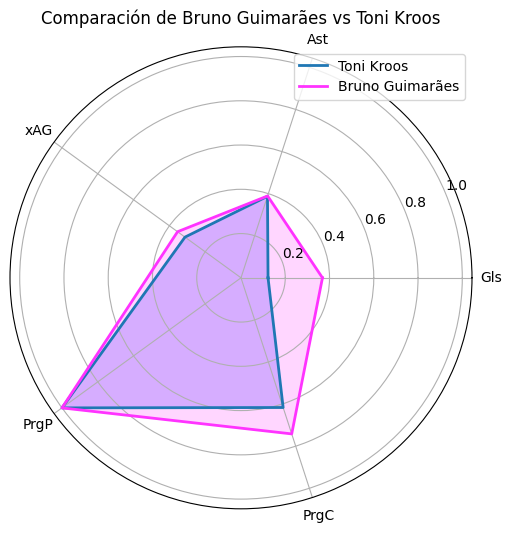

In [98]:
# Datos
metricas = ["Gls", "Ast", "xAG", "PrgP", "PrgC"]
valores_kroos = [1, 8, 4.9, 290, 32]
jugador = 'Bruno Guimarães'
valores_jugador = [7, 8, 6.4, 283, 65]

# Aplicar el escalado logarítmico (log(1 + valor) para evitar log(0))
valores_kroos_log = np.log1p(valores_kroos)
valores_jugador_log = np.log1p(valores_jugador)

# Normalizar los valores logarítmicos
valores_kroos_log_normalizados = valores_kroos_log / np.max(valores_kroos_log)
valores_jugador_log_normalizados = valores_jugador_log / np.max(valores_jugador_log)

# Añadir el primer valor al final para cerrar el gráfico
valores_kroos_log_normalizados = np.append(valores_kroos_log_normalizados, valores_kroos_log_normalizados[0])
valores_jugador_log_normalizados = np.append(valores_jugador_log_normalizados, valores_jugador_log_normalizados[0])

# Generar ángulos igualmente espaciados para cada métrica
angulos = np.linspace(0, 2 * np.pi, len(metricas), endpoint=False).tolist()
angulos += angulos[:1]  # Añadir el primer ángulo al final para cerrar el gráfico

# Crear el gráfico
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Dibujar las líneas de cada jugador
ax.plot(angulos, valores_kroos_log_normalizados, linewidth=2, linestyle='solid', label='Toni Kroos')
ax.fill(angulos, valores_kroos_log_normalizados, 'b', alpha=0.2)

ax.plot(angulos, valores_jugador_log_normalizados, linewidth=2, linestyle='solid', label=jugador, color='#FF33FF')
ax.fill(angulos, valores_jugador_log_normalizados, color='#FF33FF', alpha=0.2)

# Añadir las etiquetas de las métricas
ax.set_xticks(angulos[:-1])  # Usar los primeros 5 ángulos (sin el duplicado)
ax.set_xticklabels(metricas)

# Título y leyenda
plt.title(f'Comparación de {jugador} vs Toni Kroos')
plt.legend(loc='upper right')

# Mostrar el gráfico
plt.show()


##### Martin Ødegaard

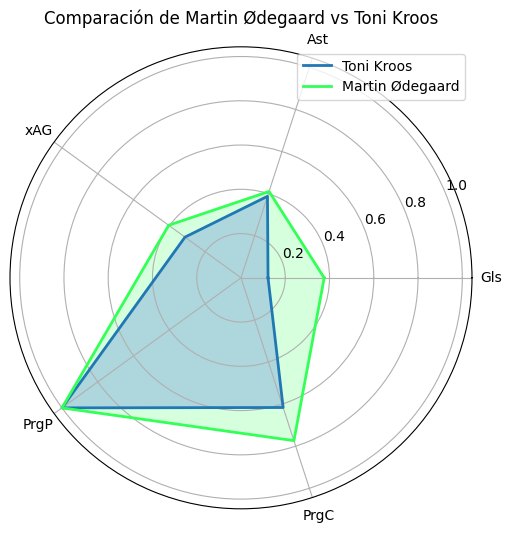

In [99]:
# Datos
metricas = ["Gls", "Ast", "xAG", "PrgP", "PrgC"]
valores_kroos = [1, 8, 4.9, 290, 32]
jugador = 'Martin Ødegaard'
valores_jugador = [8, 10, 9.6, 344, 91]

# Aplicar el escalado logarítmico (log(1 + valor) para evitar log(0))
valores_kroos_log = np.log1p(valores_kroos)
valores_jugador_log = np.log1p(valores_jugador)

# Normalizar los valores logarítmicos
valores_kroos_log_normalizados = valores_kroos_log / np.max(valores_kroos_log)
valores_jugador_log_normalizados = valores_jugador_log / np.max(valores_jugador_log)

# Añadir el primer valor al final para cerrar el gráfico
valores_kroos_log_normalizados = np.append(valores_kroos_log_normalizados, valores_kroos_log_normalizados[0])
valores_jugador_log_normalizados = np.append(valores_jugador_log_normalizados, valores_jugador_log_normalizados[0])

# Generar ángulos igualmente espaciados para cada métrica
angulos = np.linspace(0, 2 * np.pi, len(metricas), endpoint=False).tolist()
angulos += angulos[:1]  # Añadir el primer ángulo al final para cerrar el gráfico

# Crear el gráfico
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Dibujar las líneas de cada jugador
ax.plot(angulos, valores_kroos_log_normalizados, linewidth=2, linestyle='solid', label='Toni Kroos')
ax.fill(angulos, valores_kroos_log_normalizados, 'b', alpha=0.2)

ax.plot(angulos, valores_jugador_log_normalizados, linewidth=2, linestyle='solid', label=jugador, color="#33FF57")
ax.fill(angulos, valores_jugador_log_normalizados, color='#33FF57', alpha=0.2)

# Añadir las etiquetas de las métricas
ax.set_xticks(angulos[:-1])  # Usar los primeros 5 ángulos (sin el duplicado)
ax.set_xticklabels(metricas)

# Título y leyenda
plt.title(f'Comparación de {jugador} vs Toni Kroos')
plt.legend(loc='upper right')

# Mostrar el gráfico
plt.show()

##### Kevin Stöger

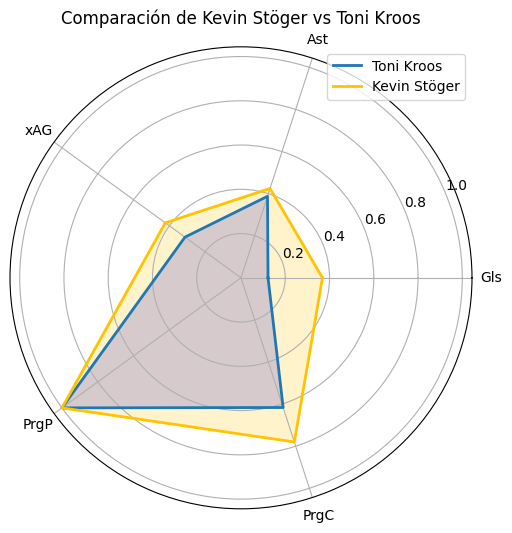

In [100]:
# Datos
metricas = ["Gls", "Ast", "xAG", "PrgP", "PrgC"]
valores_kroos = [1, 8, 4.9, 290, 32]
jugador = 'Kevin Stöger'
valores_jugador = [7, 10, 9.9, 283, 81]

# Aplicar el escalado logarítmico (log(1 + valor) para evitar log(0))
valores_kroos_log = np.log1p(valores_kroos)
valores_jugador_log = np.log1p(valores_jugador)

# Normalizar los valores logarítmicos
valores_kroos_log_normalizados = valores_kroos_log / np.max(valores_kroos_log)
valores_jugador_log_normalizados = valores_jugador_log / np.max(valores_jugador_log)

# Añadir el primer valor al final para cerrar el gráfico
valores_kroos_log_normalizados = np.append(valores_kroos_log_normalizados, valores_kroos_log_normalizados[0])
valores_jugador_log_normalizados = np.append(valores_jugador_log_normalizados, valores_jugador_log_normalizados[0])

# Generar ángulos igualmente espaciados para cada métrica
angulos = np.linspace(0, 2 * np.pi, len(metricas), endpoint=False).tolist()
angulos += angulos[:1]  # Añadir el primer ángulo al final para cerrar el gráfico

# Crear el gráfico
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Dibujar las líneas de cada jugador
ax.plot(angulos, valores_kroos_log_normalizados, linewidth=2, linestyle='solid', label='Toni Kroos')
ax.fill(angulos, valores_kroos_log_normalizados, 'b', alpha=0.2)

ax.plot(angulos, valores_jugador_log_normalizados, linewidth=2, linestyle='solid', label=jugador, color="#FFC300")
ax.fill(angulos, valores_jugador_log_normalizados, color='#FFC300', alpha=0.2)

# Añadir las etiquetas de las métricas
ax.set_xticks(angulos[:-1])  # Usar los primeros 5 ángulos (sin el duplicado)
ax.set_xticklabels(metricas)

# Título y leyenda
plt.title(f'Comparación de {jugador} vs Toni Kroos')
plt.legend(loc='upper right')

# Mostrar el gráfico
plt.show()

##### Luis Alberto

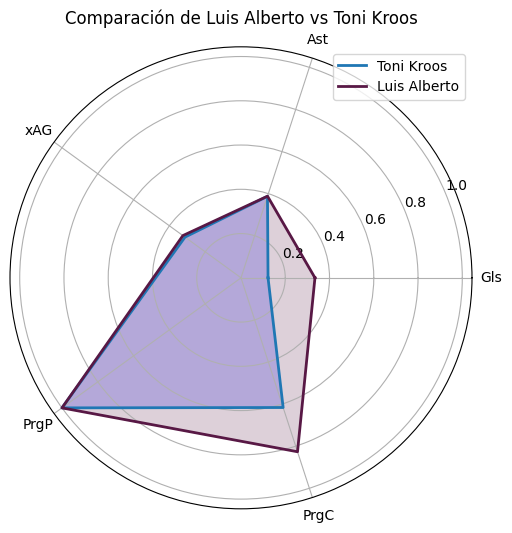

In [101]:
# Datos
metricas = ["Gls", "Ast", "xAG", "PrgP", "PrgC"]
valores_kroos = [1, 8, 4.9, 290, 32]
jugador = 'Luis Alberto'
valores_jugador = [5, 7, 4.7, 212, 83]

# Aplicar el escalado logarítmico (log(1 + valor) para evitar log(0))
valores_kroos_log = np.log1p(valores_kroos)
valores_jugador_log = np.log1p(valores_jugador)

# Normalizar los valores logarítmicos
valores_kroos_log_normalizados = valores_kroos_log / np.max(valores_kroos_log)
valores_jugador_log_normalizados = valores_jugador_log / np.max(valores_jugador_log)

# Añadir el primer valor al final para cerrar el gráfico
valores_kroos_log_normalizados = np.append(valores_kroos_log_normalizados, valores_kroos_log_normalizados[0])
valores_jugador_log_normalizados = np.append(valores_jugador_log_normalizados, valores_jugador_log_normalizados[0])

# Generar ángulos igualmente espaciados para cada métrica
angulos = np.linspace(0, 2 * np.pi, len(metricas), endpoint=False).tolist()
angulos += angulos[:1]  # Añadir el primer ángulo al final para cerrar el gráfico

# Crear el gráfico
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Dibujar las líneas de cada jugador
ax.plot(angulos, valores_kroos_log_normalizados, linewidth=2, linestyle='solid', label='Toni Kroos')
ax.fill(angulos, valores_kroos_log_normalizados, 'b', alpha=0.2)

ax.plot(angulos, valores_jugador_log_normalizados, linewidth=2, linestyle='solid', label=jugador, color="#581845")
ax.fill(angulos, valores_jugador_log_normalizados, color='#581845', alpha=0.2)

# Añadir las etiquetas de las métricas
ax.set_xticks(angulos[:-1])  # Usar los primeros 5 ángulos (sin el duplicado)
ax.set_xticklabels(metricas)

# Título y leyenda
plt.title(f'Comparación de {jugador} vs Toni Kroos')
plt.legend(loc='upper right')

# Mostrar el gráfico
plt.show()

##### Rodri

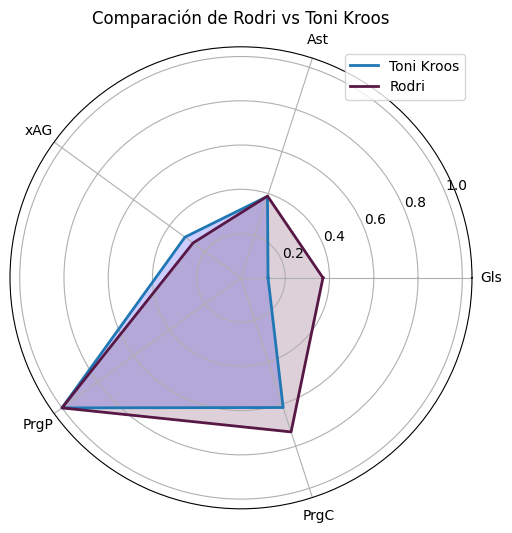

In [102]:
# Datos
metricas = ["Gls", "Ast", "xAG", "PrgP", "PrgC"]
valores_kroos = [1, 8, 4.9, 290, 32]
jugador = 'Rodri'
valores_jugador = [8, 9, 3.9, 376, 76]

# Aplicar el escalado logarítmico (log(1 + valor) para evitar log(0))
valores_kroos_log = np.log1p(valores_kroos)
valores_jugador_log = np.log1p(valores_jugador)

# Normalizar los valores logarítmicos
valores_kroos_log_normalizados = valores_kroos_log / np.max(valores_kroos_log)
valores_jugador_log_normalizados = valores_jugador_log / np.max(valores_jugador_log)

# Añadir el primer valor al final para cerrar el gráfico
valores_kroos_log_normalizados = np.append(valores_kroos_log_normalizados, valores_kroos_log_normalizados[0])
valores_jugador_log_normalizados = np.append(valores_jugador_log_normalizados, valores_jugador_log_normalizados[0])

# Generar ángulos igualmente espaciados para cada métrica
angulos = np.linspace(0, 2 * np.pi, len(metricas), endpoint=False).tolist()
angulos += angulos[:1]  # Añadir el primer ángulo al final para cerrar el gráfico

# Crear el gráfico
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Dibujar las líneas de cada jugador
ax.plot(angulos, valores_kroos_log_normalizados, linewidth=2, linestyle='solid', label='Toni Kroos')
ax.fill(angulos, valores_kroos_log_normalizados, 'b', alpha=0.2)

ax.plot(angulos, valores_jugador_log_normalizados, linewidth=2, linestyle='solid', label=jugador, color="#581845")
ax.fill(angulos, valores_jugador_log_normalizados, color='#581845', alpha=0.2)

# Añadir las etiquetas de las métricas
ax.set_xticks(angulos[:-1])  # Usar los primeros 5 ángulos (sin el duplicado)
ax.set_xticklabels(metricas)

# Título y leyenda
plt.title(f'Comparación de {jugador} vs Toni Kroos')
plt.legend(loc='upper right')

# Mostrar el gráfico
plt.show()

### Contribución jugador vs equipo

In [103]:
leverkusen = top_players[top_players["Squad"] == "Leverkusen"]

In [104]:
suma = leverkusen.select_dtypes(include='number').sum()

In [105]:
suma_leverkusen = pd.DataFrame(suma).T
suma_leverkusen['Jugador'] = 'Total' 

In [106]:
leverkusen_final = pd.concat([leverkusen, suma_leverkusen], ignore_index=True)

In [107]:
ratio_goles_wirtz = (11 / 87) * 100
ratio_asist_wirtz = (11 / 71) * 100
ratio_xag_wirtz = (7.5 / 75.5) * 100
ratio_prgc_wirtz = (138 / 888) * 100
ratio_prgp_wirtz = (224 /1997) * 100

In [108]:
print(round(ratio_goles_wirtz, 2))
print(round(ratio_asist_wirtz, 2))
print(round(ratio_xag_wirtz, 2))
print(round(ratio_prgc_wirtz, 2))
print(round(ratio_prgp_wirtz, 2))

12.64
15.49
9.93
15.54
11.22


In [109]:
################
########################

In [110]:
bundesliga_23_24 = pd.read_csv("../data/bundesliga_23_24.csv")

In [111]:
bundesliga_23_24 = bundesliga_23_24.rename(columns={"Equipo": "Squad", "xG": "Goles Esperados", "xGA": "Gls esp. permitidos", "xGD": "Dif. Gls. Esper."})


In [112]:
df_valor_bundesliga = pd.merge(df_jugadores_repetidos, bundesliga_23_24, on='Squad', how='left')

In [113]:
df_valor_bundesliga.drop(["Asistencia", "Máximo Goleador del Equipo", "Portero", "Notas"], axis=1, inplace=True)


In [114]:
# Cálculo del valor del equipo basado en su rendimiento general
df_valor_bundesliga['valor_equipo'] = (df_valor_bundesliga['Pts/PJ'] + df_valor_bundesliga['DG'] + df_valor_bundesliga['GF'] + df_valor_bundesliga['Dif. Gls. Esper.']) / 4  # Ponderación simple


In [115]:
# Cálculo del valor del jugador basado en su rendimiento general en las métricas clave
df_valor_bundesliga['valor_individual'] = (df_valor_bundesliga['Gls_x'] + df_valor_bundesliga['Ast_x'] + df_valor_bundesliga['xAG_x'] + df_valor_bundesliga['PrgP_x']) + df_valor_bundesliga["PrgC_x"] / 5  # Ponderación simple

In [116]:
# Cálculo del impacto del jugador en relación con el equipo
df_valor_bundesliga['impacto_jugador_equipo'] = df_valor_bundesliga['valor_individual'] / df_valor_bundesliga['valor_equipo']

In [117]:
df_valor_bundesliga

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,DG,Pts,Pts/PJ,Goles Esperados,Gls esp. permitidos,Dif. Gls. Esper.,xGD/90,valor_equipo,valor_individual,impacto_jugador_equipo
0,Florian Wirtz,de GER,MF,Leverkusen,de Bundesliga,20.0,2003.0,32,26,2372,...,65.0,90.0,2.65,73.6,29.9,43.7,1.29,50.0875,281.1,5.612179
1,Xavi Simons,nl NED,MF,RB Leipzig,de Bundesliga,20.0,2003.0,32,32,2653,...,38.0,65.0,1.91,65.6,40.1,25.5,0.75,35.6025,246.0,6.909627
2,Kevin Stöger,at AUT,MF,Bochum,de Bundesliga,29.0,1993.0,32,32,2668,...,-32.0,33.0,0.97,44.5,63.9,-19.3,-0.57,-2.0825,326.1,-156.590636
3,Leon Goretzka,de GER,MF,Bayern Munich,de Bundesliga,28.0,1995.0,30,25,2241,...,49.0,72.0,2.12,85.2,32.1,53.0,1.56,49.5300,207.5,4.189380
4,Rodri,es ESP,MF,Manchester City,eng Premier League,27.0,1996.0,34,34,2931,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,412.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,Federico Valverde,uy URU,MF,Real Madrid,es La Liga,25.0,1998.0,37,33,2904,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,266.6,NaN
88,Maxence Caqueret,fr FRA,MF,Lyon,fr Ligue 1,23.0,2000.0,34,34,3022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,310.0,NaN
89,Henrikh Mkhitaryan,am ARM,MF,Inter,it Serie A,34.0,1989.0,36,35,2785,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,224.9,NaN
90,Luis Alberto,es ESP,MF,Lazio,it Serie A,30.0,1992.0,33,29,2311,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,245.3,NaN


In [118]:
#############
#####################################################

In [119]:
#premier_23_24 = pd.read_csv("../data/premier_23_24.csv")

#premier_23_24 = premier_23_24.rename(columns={"MP": "PJ", "W": "PG", "D": "PE", "L": "PP", "GA": "GC", "GD": "DG", "Pts/MP": "Pts/PJ", "xG": "Goles Esperados", "xGA": "Gls esp. permitidos", "xGD": "Dif. Gls.Esper."})

In [120]:
#df_jugadores_equipo = pd.merge(df_jugadores_equipo, premier_23_24, on=df_jugadores_equipo.columns.tolist(), how='inner')